<h1>AE Spraybit Data Analysis</h1>

In [1]:
#Import Data (Raw Data)
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# #TO EXCEL
from pandas import ExcelWriter #Import excel file library
import os

resultDir = 'Multi_BigBang1/'    #set where to place preprocessed results 

if not os.path.exists(resultDir):
    os.makedirs(resultDir)

## set up  !!  print summary of all details

folderIDs=[]
xl_files = []
#   Data directory with folders for each study leg and timepoint !!no other data in the folder
# folderDir='StrideTot/'
folderDir='RawData/'
# dataDir='RawData/FB 2/Result/'   #starting directory with folders for each test leg / time point   ****no other files or folders
nameForImage = resultDir + 'Multi_charts_'

folderIDs = [f for f in os.listdir(folderDir)]  # find all folders in folderDir
for folders in folderIDs:
    #  for each study leg folder the excel results are in a subfolder Resultb
    dataDir=folderDir+folders+'/Result_xl/'
    filesA = [f for f in os.listdir(dataDir) if f.endswith('.' + 'xlsx')]
    xl_files = [x[:-5] for x in filesA]
    print(folders, ' : ',xl_files)
    print()

print(folderIDs)

#Set up for filter by date time for each leg

# list of each time point active dates -- start and end
# startMo = ['2019-06-18','2019-07-18','2019-08-20','2019-09-20','2019-10-23']
# endMo =['2019-07-19','2019-08-22','2019-09-20','2019-10-23','2019-11-15']
startMo = ['2020-05-13']
endMo =['2020-10-30']
print(startMo)
print(endMo)
# print(second_time)
# xl_files.pop(1)   #remove last filename with bad data
# print(xl_files)


NC  :  ['NC_011_fix', 'NC_013', 'NC_014', 'NC_015', 'NC_017', 'NC_026c']

NZ  :  ['NZ_018', 'NZ_019_fix', 'NZ_022_fix', 'NZ_023', 'NZ_024', 'NZ_025']

VH  :  ['VH_004', 'VH_006', 'VH_007', 'VH_008']

['NC', 'NZ', 'VH']
['2020-05-13']
['2020-10-30']


In [2]:
#  iterate through all folders / files to create one df with all study data

result =pd.DataFrame()  # clear any data from memory

#loop through the folders
for folders in folderIDs:
    dataDir=folderDir+folders+'/Result_xl/'
    print(folders)
    filesA = [f for f in os.listdir(dataDir) if f.endswith('.' + 'xlsx')]
    xl_files = [x[:-5] for x in filesA]
    
    #Loop through each file
    for i in range(len(xl_files)):
        joinedfilename = dataDir + xl_files[i] + '.xlsx'
    #     df1 = pd.read_excel(xl_files[i],sheet_name='Sheet2')
    #     df1 = pd.read_excel(joinedfilename,sheet_name='StrokeReport')
        df1 = pd.read_excel(joinedfilename,sheet_name='Sheet2')
        #df2 = pd.read_excel('f1t1.xlsx',sheet_name='Sheet2')
    #     df1['Deg/Sec']=df1['SPM']*df1['degrees']/60
        df1.rename(columns={'angvelocity': 'Deg/Sec'}, inplace=True)    
    #     df1['%Pull']=df1['degrees']/maxDegrees*100  # redefine once new maxdegrees of all data defined
        df1['sprayer']=xl_files[i]
        df1['SPM_Calc']=1/(df1['fduration']*2/60)
        df1['Sprayer_color']=i/100*2+.1
        
        
#         df1['datetime'] =  pd.to_datetime(df1['datetime'], format='%m/%d/%y %H:%M:%S.%f') #converting data type
        result = pd.concat([result,df1], sort=True)

        print(xl_files[i],end=', ')
        
    print('')
    print('df length - ', len(result))

# excelextension = '.xlsx'
# exceljoinedfilename = 'totalxl'+excelextension
# writer = ExcelWriter(exceljoinedfilename) #set file name


# result.to_excel(writer,'Sheet2') #Write df4 data table to sheet 1 of file
# writer.save() #save file

# print(result)

NC
NC_011_fix, NC_013, NC_014, NC_015, NC_017, NC_026c, 
df length -  612
NZ
NZ_018, NZ_019_fix, NZ_022_fix, NZ_023, NZ_024, NZ_025, 
df length -  1610
VH
VH_004, VH_006, VH_007, VH_008, 
df length -  2132


In [3]:
#Convert datetime column to Pandas DateTime Format

# df2=result2  # rename to accommodate code
# df2['datetime'] =  pd.to_datetime(df2['datetime'], format='%m/%d/%y %H:%M:%S.%f') #converting data type
result1=result.copy() #copy to new
result1['datetime'] =  pd.to_datetime(result1['datetime'], format='%m/%d/%y %H:%M:%S.%f') #converting data type
print(result1)

   LegID    SPM_Calc  ShakeMax  ShakeTime  Sprayer_color   Sweep   SweepRate  \
0     NC         NaN       NaN        NaN           0.10     NaN         NaN   
1     NC  136.934360     2.265       79.0           0.10  459.06  146.809333   
2     NC  301.255591     2.265       79.0           0.10  537.40  181.090330   
3     NC  334.728435     2.265      288.0           0.10  314.58  136.751780   
4     NC  273.868719     2.265      537.0           0.10  551.02  140.438118   
..   ...         ...       ...        ...            ...     ...         ...   
80    VH         NaN       NaN        NaN           0.16     NaN         NaN   
81    VH         NaN       NaN        NaN           0.16     NaN         NaN   
82    VH         NaN       NaN        NaN           0.16     NaN         NaN   
83    VH         NaN       NaN        NaN           0.16     NaN         NaN   
84    VH         NaN       NaN        NaN           0.16     NaN         NaN   

     TimeID  Unnamed: 0        ax  ... 

In [4]:
#  filter each leg based on active study dates
#  study leg dates must be in match order of time IDs found...not necessarily in order

dfFiltered = pd.DataFrame()
dateFilter = pd.DataFrame()
timeIDs = result1['TimeID'].unique()
print (timeIDs)
# print(timeIDs[:-1])
# print(result1[(result1['TimeID']!=timeIDs[0])&(result1['TimeID']!=timeIDs[1])&(result1['TimeID']!=timeIDs[2])])
i=0
for month in timeIDs:
#     print(i)
    timeMask=(result1['TimeID'] == month)
    dateFilter=result1.loc[timeMask].copy()

    dateMask = (dateFilter['datetime'] > startMo[i]) & (dateFilter['datetime'] <= endMo[i])
    dateFilter = dateFilter.loc[dateMask].copy()
    
    dfFiltered = pd.concat([dfFiltered,dateFilter], sort=True)
    i+=1
    
# print(dfFiltered['datetime'])

['Month 1']


In [5]:
# filter out results from obvious bad data--impossibly long, short, fast strokes

result2 = dfFiltered.replace('', np.nan,regex=True)
# result2=result2.drop(['SPM'],axis=1)

#remove rows with blank data aka wake/sleep rows
print('start row count = ', len(result2))
result2=result2.dropna(axis=0, thresh =6)
print('drop na row count = ', len(result2))
result2=result2[result2['type']=='normal']
print('without wake row count = ', len(result2))

# maxDegrees = result2['degrees'].max()    #assume at least one pull in all data was 100%
# print('max degrees = ',maxDegrees)
# result2['%Pull']=result2['degrees']/maxDegrees*100
                     
# result2=result2.dropna(axis=0,how=any,thresh=5,inplace=False)
# result2 = result2[result2['degrees']>5]
# print('end row count = ', len(result2))
# result2 = result2[result2['Deg/Sec']<500]
# print('end row count = ', len(result2))
# result2 = result2[result2['fduration']<2]
# print('end row count = ', len(result2))

excelextension = '.xlsx'
exceljoinedfilename = 'totalxl'+excelextension
# writer = ExcelWriter(exceljoinedfilename) #set file name
# result.to_excel(writer,'prefilter') #Write df4 data table to sheet 1 of file
# result2.to_excel(writer,'Filtered') #Write df4 data table to sheet 1 of file
# writer.save() #save file

# print(result2)

start row count =  2132
drop na row count =  2132
without wake row count =  1005


In [6]:
totalmedian = result2['spraydirectionscore'].median()
print(totalmedian)

-20.0


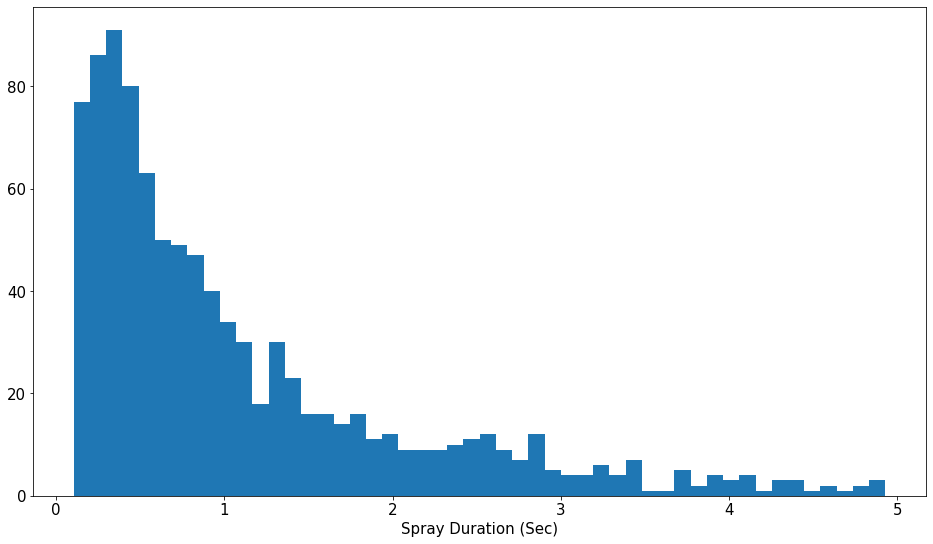

In [7]:

plt.rcParams.update({'font.size': 15})
dfDurFilt=result2[result2['duration']<5]
n_bins = 50
x_hist=dfDurFilt['duration']
fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins)

ax.set_xlabel('Spray Duration (Sec)')
plt.show()

# # picname = dataDir + nameForImage + '_trigSpeed_hist' + '.png'
picname = nameForImage + '_SprayDuration_hist' + '.png'
fig.savefig(picname, transparent=True)

In [8]:

# fig, ax = plt.subplots(figsize=(16,9))
# n, bins, patches = ax.hist(x_hist, n_bins, density=True, histtype='step', cumulative=True, label='Cumulative',linewidth=7.0)

# ax.set_title('Cumulative step Deg/Sec')
# ax.set_xlabel('Deg/Sec')
# ax.set_ylabel('Percentage')
# ax.grid(True)
# plt.show()


# picname = dataDir + nameForImage + '_trigSpeed_cumulative' + '.png'
# picname = nameForImage + '_trigSpeed_cumulative' + '.png'
# fig.savefig(picname, transparent=True)

In [9]:
# n_bins = 50
# x_hist=result2['%Pull']
# fig, ax = plt.subplots(figsize=(16,9))
# n, bins, patches = ax.hist(x_hist, n_bins)
# plt.xlabel('%Pull')
# plt.show()


# # n_bins = 100
# # x_hist=result2['Deg/Sec']
# # fig, ax = plt.subplots(figsize=(16,9))
# # n, bins, patches = ax.hist(x_hist, n_bins)

# # ax.set_xlabel('Trigger Speed (Deg/Sec)')
# # plt.show()

# # picname = dataDir + nameForImage + '_pull_hist' + '.png'
# picname = nameForImage + '_pull_hist' + '.png'
# fig.savefig(picname, transparent=True)

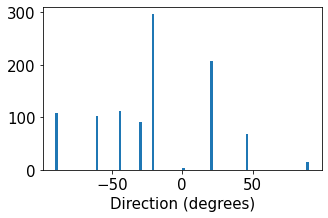

In [10]:
n_bins = 100
x_hist=result2['spraydirectionscore']
plt.figure(figsize=(5,3))
n, bins, patches = plt.hist(x_hist, bins=n_bins,)
plt.xlabel('Direction (degrees)')
plt.show()

# picname = dataDir + nameForImage + '_SprayDirection_Hist' + '.png'
# fig.savefig(picname, transparent=True)

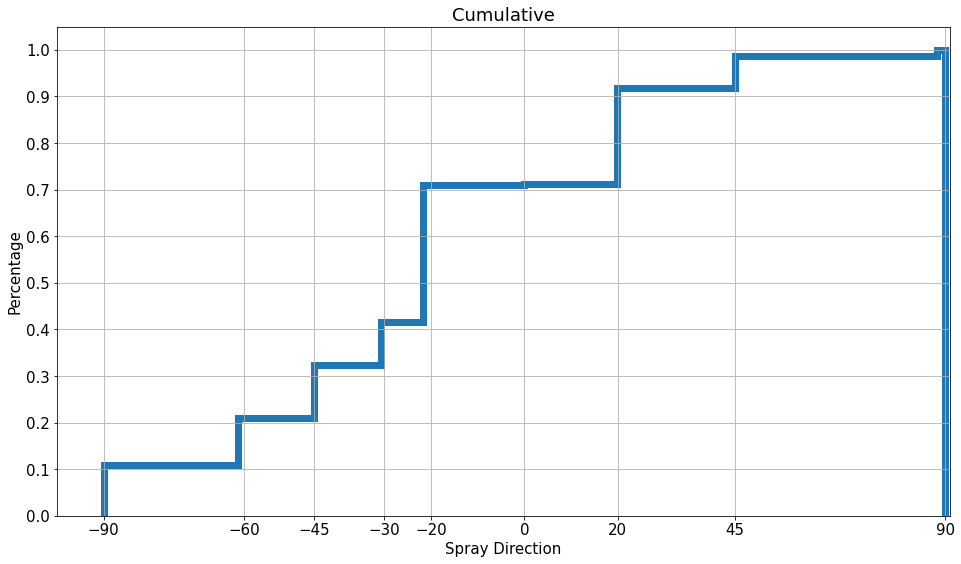

In [11]:

fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins, density=True, histtype='step', cumulative=True, label='Cumulative',linewidth=7.0)

ax.set_title('Cumulative')
ax.set_xlabel('Spray Direction')
ax.set_xticks([-90,-60,-45,-30,-20,0,20,45,90])
plt.xlim([-100, 91])
plt.yticks(np.arange(0, 1.1, .10))
ax.set_ylabel('Percentage')
ax.grid(True)
plt.show()


# picname = dataDir + nameForImage + '_SprayDirection_cumulative' + '.png'
# picname = nameForImage + '_SprayDirection_cumulative' + '.png'
# fig.savefig(picname, transparent=True)

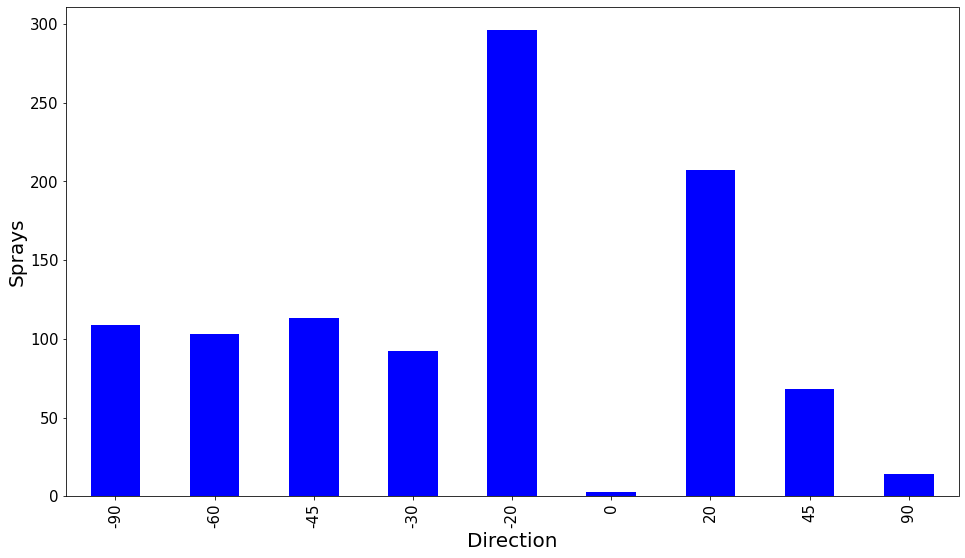

In [12]:

df20 = pd.DataFrame()  #clear any data


df20['spraydirectionscore']=result2['spraydirectionscore'].value_counts()
df20.sort_index(inplace=True)
# print(df20)
                                        
fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)

ax = df20['spraydirectionscore'].plot.bar(color="b")
ax.set_ylabel('Sprays',fontsize=20)
ax.set_xlabel('Direction',fontsize=20)
plt.xticks(fontsize=15)

# picname = dataDir + nameForImage + '_SprayDirection_Bar' + '.png'
picname = nameForImage + '_SprayDirection_Bar' + '.png'
fig.savefig(picname, transparent=True)

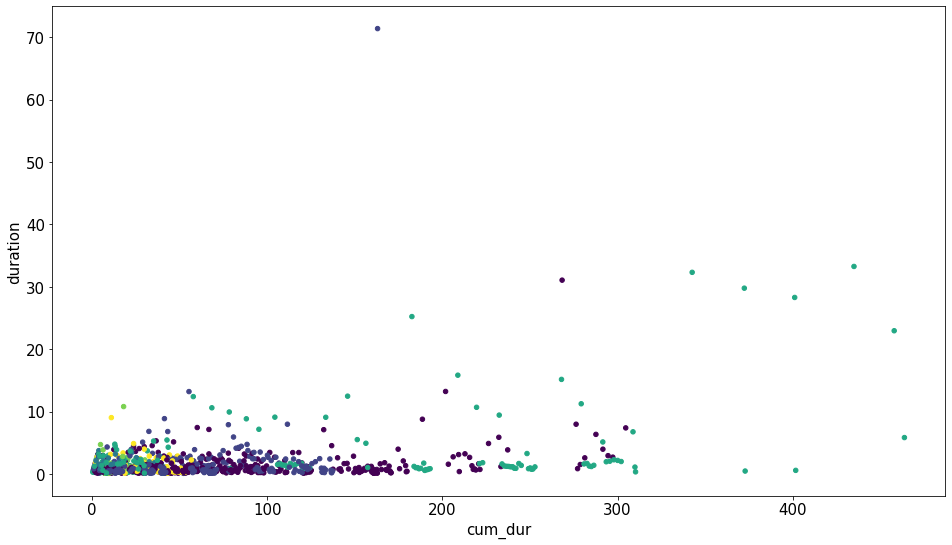

In [13]:
# spray duration as function of cumulative sprays

x_name='cum_dur'
y_name='duration'

x_scat = result2[x_name]
y_scat = result2[y_name]
color_scat = result2['Sprayer_color']

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.scatter(x_scat,y_scat, s=20, c=color_scat)
fig.set_size_inches(16,9)

ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show()
picname = nameForImage + '_CumDurvDuration' + '.png'
fig.savefig(picname, transparent=True)

In [14]:
#Convert datetime column to Pandas DateTime Format
df2=result2.copy()  # rename to accommodate code
# df2['datetime'] =  pd.to_datetime(df2['datetime'], format='%m/%d/%y %H:%M:%S.%f') #converting data type

#Create a date only column
df2['date'] = df2.datetime.dt.date
# df2.head()


# df2['User']=df2['sprayer'].str[:-3]
# df2['User']=df2['sprayer'].str.split('-').str[0]
df2['User']=df2['sprayer']
# df2['User']=pd.to_numeric(df2['User'], errors='coerce')
# ax=sns.jointplot(x="User", y="spraydirectionscore", data=df2, kind='kde',size=10)

# picname = dataDir + nameForImage + '_directionScore_joint' + '.png'
# ax.savefig(picname)
 


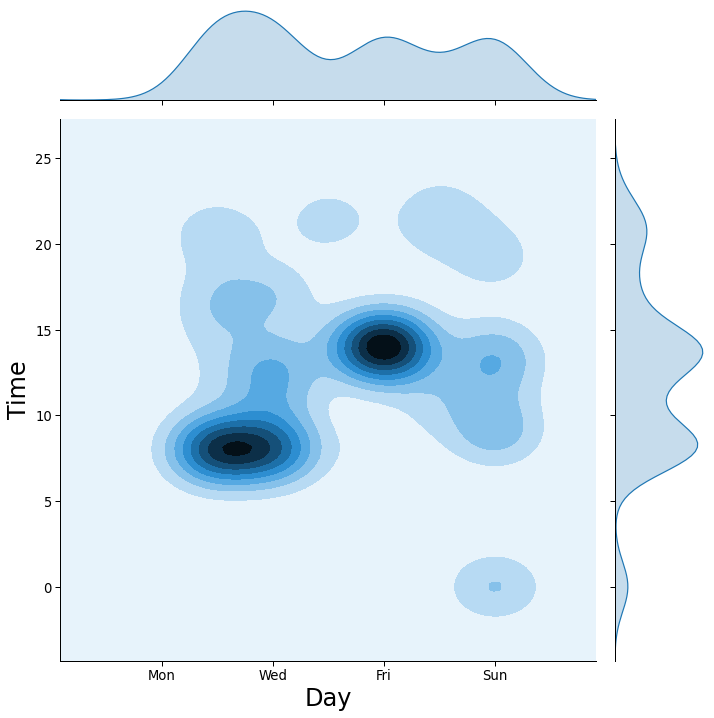

In [168]:
# print(df2)

sns.set_context("paper", font_scale=1.5)
plt.rcParams.update({'font.size': 12})


df2['weekday'] = df2['datetime'].dt.dayofweek
df2['hour'] = df2['datetime'].dt.hour
# ax=sns.jointplot(x="weekday", y="hour", data=df2, kind="kde",height=10)
# ax.set_axis_labels('Day', 'Time', fontsize=24)
# daysList=['x','','Mon','Tue','Wed','Thur','Fri','Sat','Sun']
# ax.ax_joint.set_xticklabels(daysList)
# picname = nameForImage + '_DayOfWeek_joint' + '.png'
# ax.savefig(picname)

df2filtjoint=pd.DataFrame()
jointMask = df2['User'] =='NZ_018'
jointMask2 = df2['User'] =='VH_006'
# jointMask = df2['User'] =='NC_026c'
# jointMask2 = df2['User'] =='VH_008'
# jointMask3 = df2['User'] =='NZ_020'
df2filtjoint = df2[jointMask]
df2filtjoint2=df2[jointMask2]
df2filtjoint=pd.concat([df2filtjoint,df2filtjoint2], sort=True)
# df2filtjoint3=df2[jointMask3]
# df2filtjoint=pd.concat([df2filtjoint,df2filtjoint3], sort=True)


# df2filtjoint=df2.loc[(df2['User']=='NZ_018') or (df2['User']==VH_006)]

ax=sns.jointplot(x="weekday", y="hour", data=df2filtjoint, kind="kde",height=10)
ax.set_axis_labels('Day', 'Time', fontsize=24)
# daysList=['x','','Mon','Tue','Wed','Thur','Fri','Sat','Sun']
daysList=['x','Mon','Wed','Fri','Sun','x']
ax.ax_joint.set_xticklabels(daysList)
# picname = dataDir + nameForImage + '_DayOfWeek_joint' + '.png'
picname = nameForImage + '_DayOfWeek_joint_Deanne' + '.png'
ax.savefig(picname)



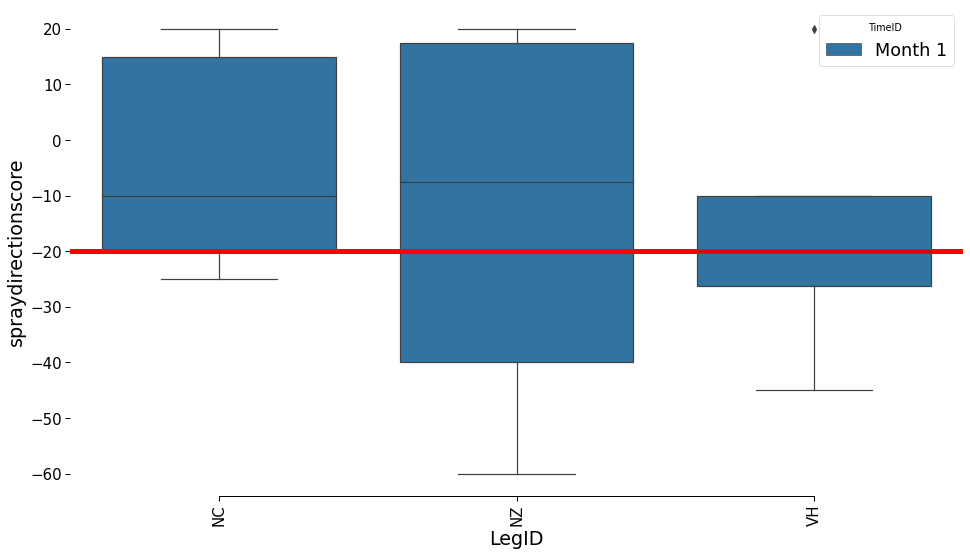

In [16]:
# df2b=df2.copy()
df10 = pd.DataFrame()  #clear any data
df2b = pd.DataFrame()
df2c = pd.DataFrame()
sns.set_context("paper", font_scale=2)
plt.rcParams.update({'font.size': 15})
df2b = df2.groupby(['LegID','TimeID','User'])['spraydirectionscore'].median().reset_index()
# print(df2b)
# df2c=df2b.copy()
del df2b['User']
totalmedian=df2b['spraydirectionscore'].median()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmedian, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="spraydirectionscore", data=df2b)
# ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_SprayDirection_Box2' + '.png'
picname = nameForImage + '_SprayDirection_Box2' + '.png'
fig.savefig(picname, transparent=True)




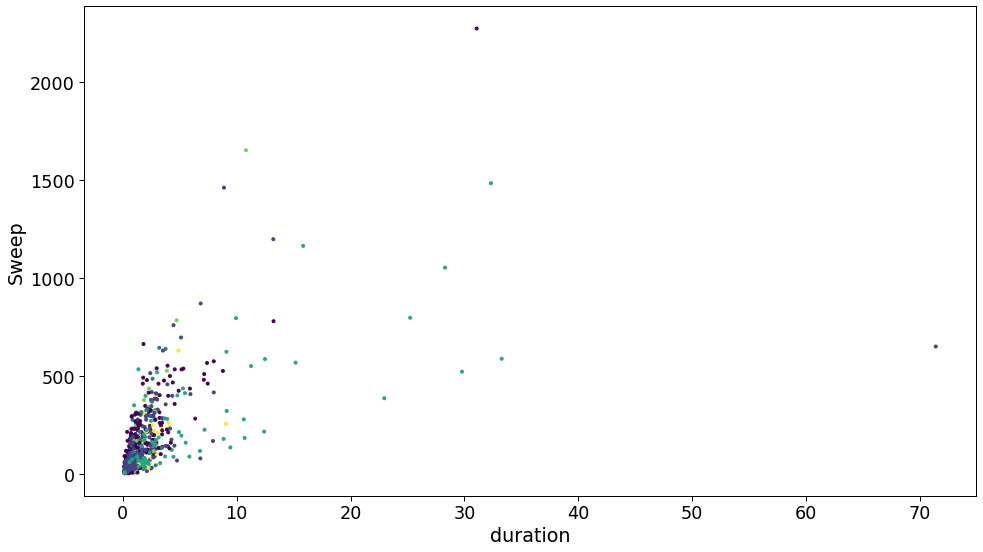

In [17]:
x_name='duration'
# x_name='degrees'
y_name='Sweep'
# y_name='Deg/Sec'

x_scat = result2[x_name]
y_scat = result2[y_name]
color_scat = result2['Sprayer_color']

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.scatter(x_scat,y_scat, s=10, c=color_scat)
fig.set_size_inches(16,9)

ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show()
# picname = nameForImage + '_DurvSweep' + '.png'
# fig.savefig(picname, transparent=True)

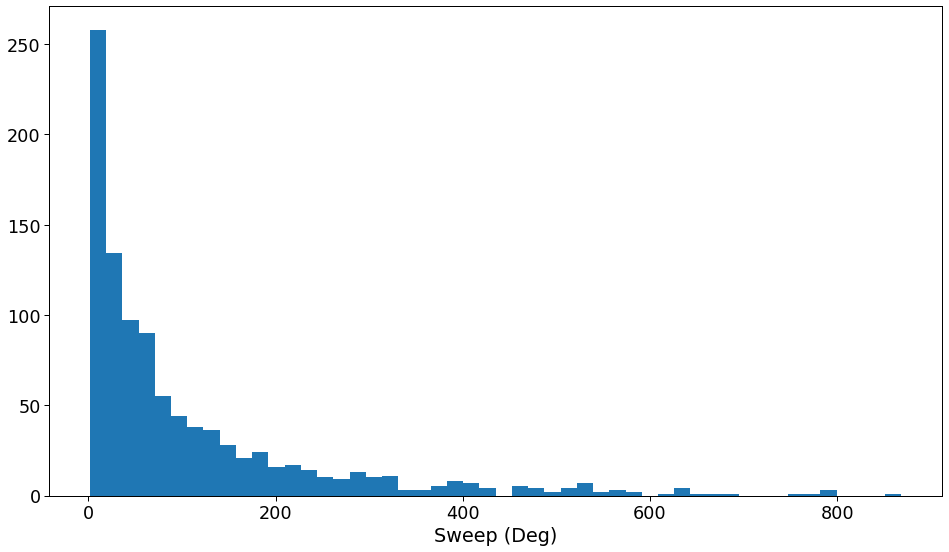

In [18]:

plt.rcParams.update({'font.size': 15})
dfSweepFilt=df2[df2['Sweep']<1000]
n_bins = 50
x_hist=dfSweepFilt['Sweep']
fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins)

ax.set_xlabel('Sweep (Deg)')
plt.show()

# # picname = dataDir + nameForImage + '_trigSpeed_hist' + '.png'
picname = nameForImage + '_SpraySweep_hist' + '.png'
fig.savefig(picname, transparent=True)

   LegID   TimeID        User   Sweep
0     NC  Month 1  NC_011_fix  128.87
1     NC  Month 1      NC_013   27.64
2     NC  Month 1      NC_014   82.41
3     NC  Month 1      NC_015   36.20
4     NC  Month 1      NC_017  107.45
5     NC  Month 1     NC_026c   93.73
6     NZ  Month 1      NZ_018   39.55
7     NZ  Month 1  NZ_019_fix  131.30
8     NZ  Month 1  NZ_022_fix   26.54
9     NZ  Month 1      NZ_023   63.68
10    NZ  Month 1      NZ_024  174.50
11    NZ  Month 1      NZ_025   13.46
12    VH  Month 1      VH_004  107.60
13    VH  Month 1      VH_006   56.24
14    VH  Month 1      VH_007  314.14
15    VH  Month 1      VH_008   76.36


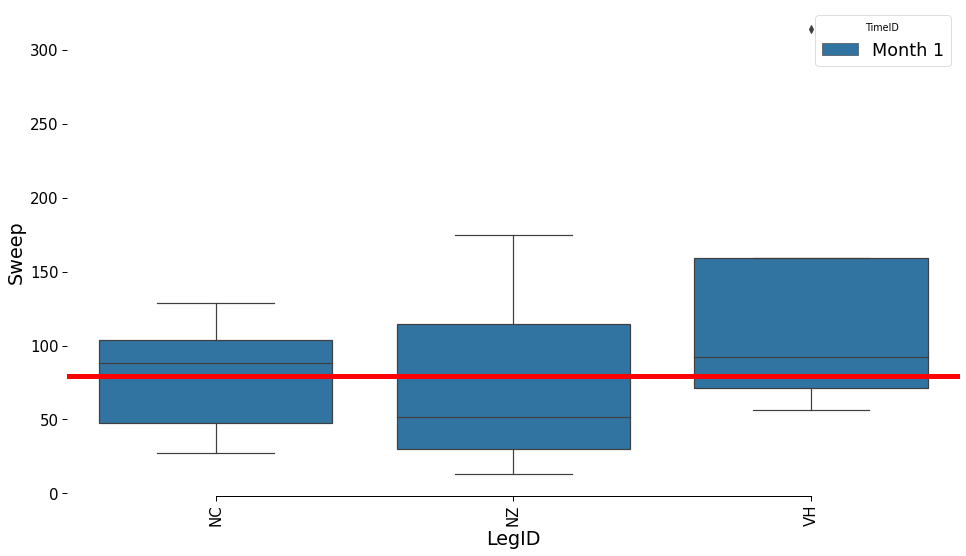

In [19]:
# df2b=df2.copy()
dfsweep = pd.DataFrame()  #clear any data

sns.set_context("paper", font_scale=2)
plt.rcParams.update({'font.size': 15})
dfsweep = df2.groupby(['LegID','TimeID','User'])['Sweep'].median().reset_index()
# dfsweep = df2.groupby(['LegID','TimeID','User','Sweep'])['mass'].median().reset_index()
print(dfsweep)
# df2c=df2b.copy()
del dfsweep['User']
SweepMedian=dfsweep['Sweep'].median()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(SweepMedian, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="Sweep", data=dfsweep)
# ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_SprayDirection_Box2' + '.png'
picname = nameForImage + '_Sweep_Box2' + '.png'
fig.savefig(picname, transparent=True)




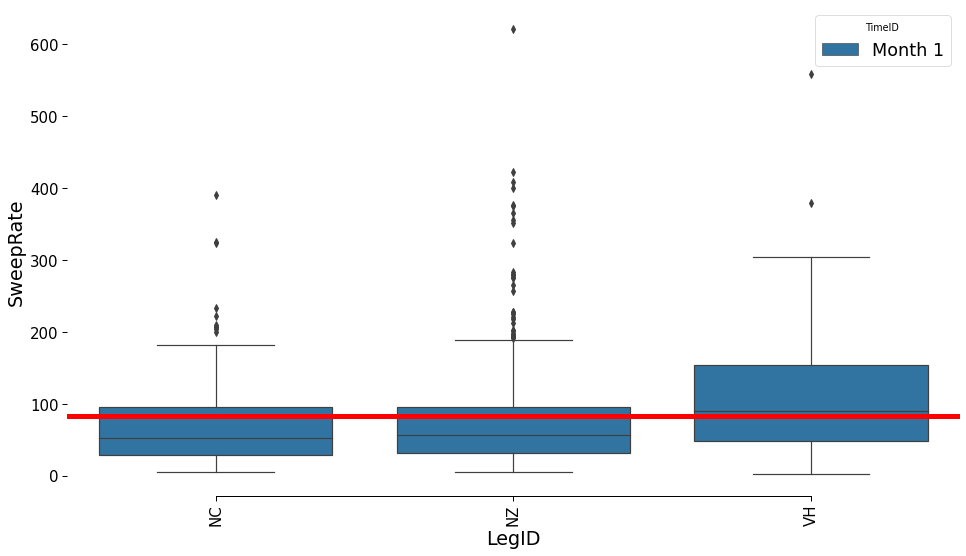

In [20]:
# df2b=df2.copy()
dfsweepRate = pd.DataFrame()  #clear any data

sns.set_context("paper", font_scale=2)
plt.rcParams.update({'font.size': 15})
# dfsweepRate = df2.groupby(['LegID','TimeID','User'])['SweepRate'].mean().reset_index()
dfsweepRate = df2.groupby(['LegID','TimeID','User','SweepRate'])['mass'].mean().reset_index()
# print(df2b)
# df2c=df2b.copy()
del dfsweepRate['User']
SweepRateMedian=dfsweepRate['SweepRate'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(SweepRateMedian, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="SweepRate", data=dfsweepRate)
# ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_SprayDirection_Box2' + '.png'
picname = nameForImage + '_SweepRate_Box2' + '.png'
fig.savefig(picname, transparent=True)




In [21]:
# df2b=df2.copy()
df2b = pd.DataFrame()  #clear any data
df2c = pd.DataFrame()

# df2b = df2.groupby(['LegID','TimeID','User'])['Deg/Sec'].mean().reset_index()
# print(df2b)

# # df2b.rename({'mass':'Strokes'},axis=1,inplace=True)
# # df2b = df2b[df2b['Strokes']<500]
# # print(df2b)
# # df2c=df2b.copy()
# del df2b['User']
# avgSpeed=df2b['Deg/Sec'].mean()
# fig, ax = plt.subplots() #Add subplot to figure
# plt.hlines(avgSpeed, -1, 5,linewidth=5,color='red')
# fig.set_size_inches(16,9)

# ax = sns.boxplot(x="LegID",hue='TimeID', y="Deg/Sec", data=df2b)
# # ax.set_ylim([-100, 100])
# plt.xticks(rotation=90, fontsize=15)
# plt.yticks(rotation=0, fontsize=15)

# sns.despine(trim=True, left=True)

# # picname = dataDir + nameForImage + '_TotalStrokes_Box' + '.png'
# picname = nameForImage + '_TriggerSpeed_Box' + '.png'
# fig.savefig(picname, transparent=True)



In [22]:


# df2b=df2.copy()
df2b = pd.DataFrame()  #clear any data
df2c = pd.DataFrame()

# df2b = df2.groupby(['LegID','TimeID','User'])['%Pull'].mean().reset_index()
# print(df2b)

# # df2b.rename({'mass':'Strokes'},axis=1,inplace=True)
# # df2b = df2b[df2b['Strokes']<500]
# # print(df2b)

# del df2b['User']
# avgPull=df2b['%Pull'].mean()
# fig, ax = plt.subplots() #Add subplot to figure
# plt.hlines(avgPull, -1, 5,linewidth=5,color='red')
# fig.set_size_inches(16,9)

# ax = sns.boxplot(x="LegID",hue='TimeID', y="%Pull", data=df2b)
# # ax.set_ylim([-100, 100])
# plt.xticks(rotation=90, fontsize=15)
# plt.yticks(rotation=0, fontsize=15)

# sns.despine(trim=True, left=True)

# # picname = dataDir + nameForImage + '_TotalStrokes_Box' + '.png'
# picname = nameForImage + '_%PUll_Box' + '.png'
# fig.savefig(picname, transparent=True)



In [23]:


# df2b=df2.copy()
df3b = pd.DataFrame()  #clear any data
df3c = pd.DataFrame()
df3d = pd.DataFrame()
df3e = pd.DataFrame()

# # print(df2)
# df3b = df2.filter(items=['LegID','TimeID','%Pull'])
# df3b['Count'] = '1'
# df3b['Count'] = df3b['Count'].astype(int)
# df3b['fullPull'] = np.where(df3b['%Pull']>=95, '1', '0')
# df3b['fullPull'] = df3b['fullPull'].astype(int)


# df3d = df3b.groupby(['LegID','TimeID'])['Count'].sum().reset_index()
# df3e = df3b.groupby(['LegID','TimeID'])['fullPull'].sum().reset_index()
# df3d['fullPull']=df3e['fullPull']
# df3d['FullStroke']=df3d['fullPull']/df3d['Count']*100
# df3d['LegName'] = df3d['LegID'] + '_' + df3d['TimeID']
# df3d.set_index('LegName', inplace=True)

# # df2c = df2b.copy()
# print(df3d)
# # print(df3e)


# fig, ax = plt.subplots(1,1) #Add subplot to figure
# fig.set_size_inches(16,9)

# ax = df3d['FullStroke'].plot.bar(color='g')
# ax.set_ylabel('% of Strokes Full',fontsize=20)
# ax.set_xlabel('LegID',fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
           

# # picname = nameForImage + '_%Full_Pull' + '.png'
# # fig.savefig(picname, transparent=True)



outliers
  LegID   TimeID    User        mass
9    NZ  Month 1  NZ_023  316.481947


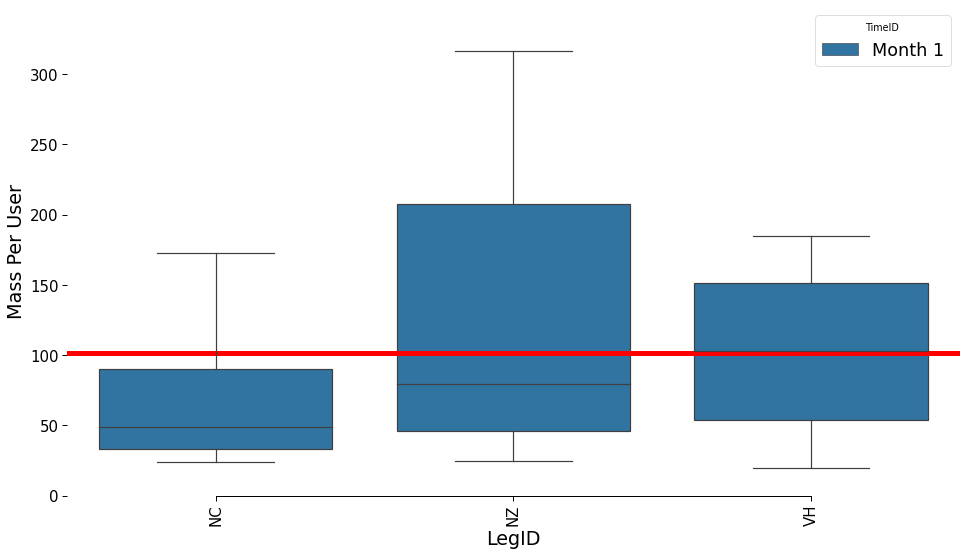

In [24]:
#   Mass per User by Leg and Month

# df2b=df2.copy()
df10 = pd.DataFrame()  #clear any data
df2b = pd.DataFrame()
df2c = pd.DataFrame()

df2b = df2.groupby(['LegID','TimeID','User'])['mass'].sum().reset_index()
# print(df2b)
print ('outliers')
dfOutliers = df2b[df2b['mass']>300]
print (dfOutliers)

# print(df2b)
del df2b['User']
totalmass=df2b['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df2b)
ax.set_ylim([0, df2b['mass'].max()*1.1])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

# ax.set_xlabel(x_name)
ax.set_ylabel('Mass Per User')
sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_TotalMass_Box_' + '.png'
picname = nameForImage + '_TotalMass_Box_' + '.png'
fig.savefig(picname, transparent=True)




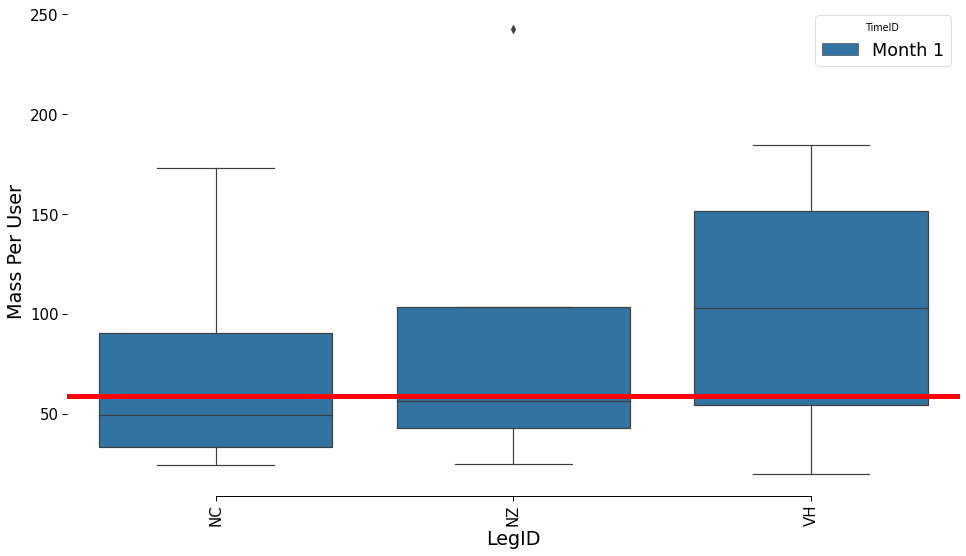

In [25]:
#   Mass per User by Leg and Month  remove outliers


# df2b=df2.copy()
df10 = pd.DataFrame()  #clear any data
df2b = pd.DataFrame()
df2c = pd.DataFrame()

df2b = df2.groupby(['LegID','TimeID','User'])['mass'].sum().reset_index()
df2b = df2b[df2b['mass']<300]
# print(df2b)
# df2c=df2b.copy()
del df2b['User']
totalmass=df2b['mass'].median()

fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df2b)
# ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
ax.set_ylabel('Mass Per User')
sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_TotalMass_Box_noOutlier' + '.png'
# picname = nameForImage + '_TotalMass_Box_noOutlier' + '.png'
# fig.savefig(picname, transparent=True)





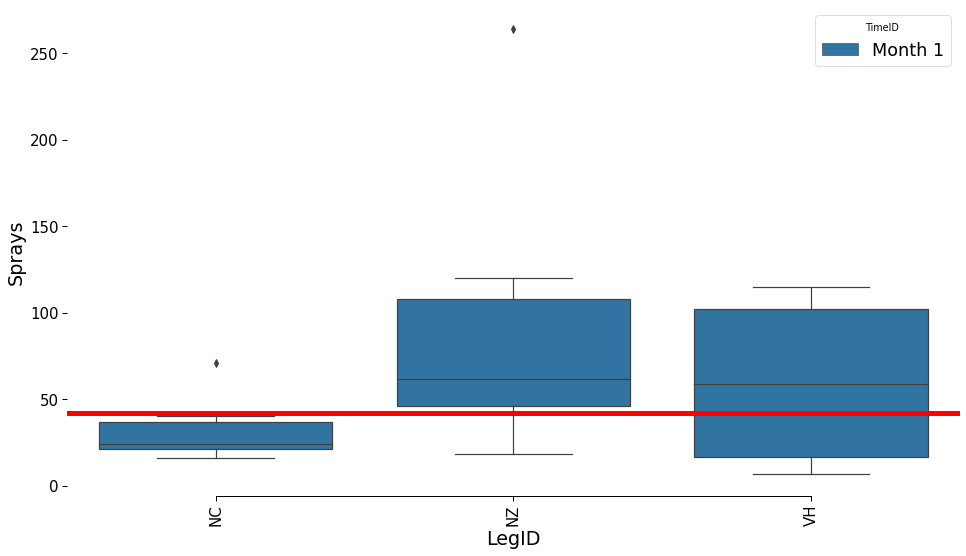

In [26]:
#   Strokes per User by Leg and Month

df10 = pd.DataFrame()  #clear any data
df2b = pd.DataFrame()
df2c = pd.DataFrame()

df2b = df2.groupby(['LegID','TimeID','User'])['mass'].size().reset_index()
# print(df2b)

df2b.rename({'mass':'Sprays'},axis=1,inplace=True)
df2b = df2b[df2b['Sprays']<500]
# print(df2b)
# df2c=df2b.copy()
del df2b['User']
totalstrokes=df2b['Sprays'].median()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalstrokes, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="Sprays", data=df2b)
# ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_TotalStrokes_Box' + '.png'
picname = nameForImage + '_TotalStrokes_Box' + '.png'
fig.savefig(picname, transparent=True)



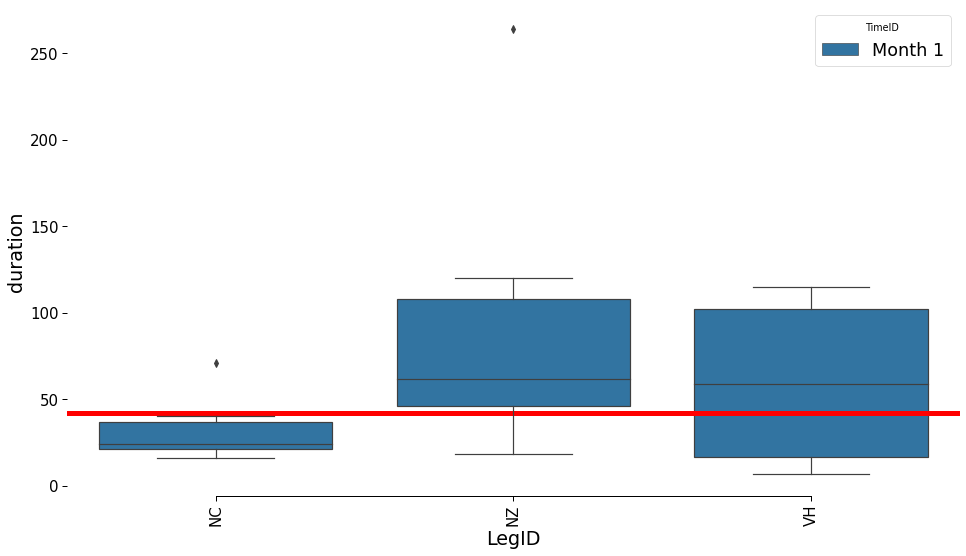

In [27]:
#   Spray duration (total) per User by Leg and Month

df10 = pd.DataFrame()  #clear any data
df2b = pd.DataFrame()
df2c = pd.DataFrame()

df2b = df2.groupby(['LegID','TimeID','User'])['duration'].size().reset_index()
# print(df2b)

# df2b.rename({'mass':'Sprays'},axis=1,inplace=True)
df2b = df2b[df2b['duration']<500]
# print(df2b)
# df2c=df2b.copy()
del df2b['User']
totalstrokes=df2b['duration'].median()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalstrokes, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="duration", data=df2b)
# ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)

# picname = dataDir + nameForImage + '_TotalStrokes_Box' + '.png'
picname = nameForImage + '_TotalDuration_Box' + '.png'
fig.savefig(picname, transparent=True)



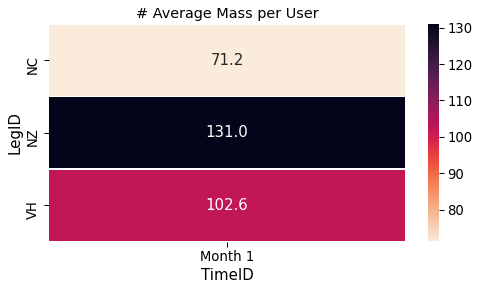

In [28]:

df8 = pd.DataFrame()  #clear any data
df8b = pd.DataFrame()  #clear any data
df8c = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()  #clear any data
df13 = pd.DataFrame()  #clear any data
df2b = pd.DataFrame()
df2c = pd.DataFrame()

# print(df2)
df2b=df2.copy()
df2b['countA']=1
df8b = df2b.countA.groupby([df2b["LegID"], df2b["TimeID"],df2b['User']]).count().reset_index()
# print(df8b)

# df8b = df8b[~df8b['User'].isin(dfOutliers['User'])]
# print(df8b)
df8c = df8b.countA.groupby([df8b["LegID"], df8b["TimeID"]]).count().reset_index()
# print(df8c)
df8 = df2.mass.groupby([df2["LegID"], df2["TimeID"]]).sum().reset_index()
# print(df8)
df8['mass']=df8['mass']/df8c['countA']
# print(df8)

df9 = df8.pivot("LegID", "TimeID", "mass")
df13 = df9.copy()

# df13['Total'] = df13.mean(axis=1)
# df13 = df13.sort_values('Total',ascending=False)

sns.set_context("paper", font_scale=1.5)
plt.rcParams.update({'font.size': 15})
# sns.set()
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.cm.rocket_r

sns.heatmap(df13, cmap=cmap, annot=True, linewidths=.5, ax=ax,fmt='.1f').set_title('# Average Mass per User')

ax.set_ylabel('LegID',fontsize=15)
ax.set_xlabel('TimeID',fontsize=15)


# picname = dataDir + nameForImage + '_MassByStudyLeg_ByMonth' + '.png'
picname = nameForImage + '_MassByStudyLeg_ByMonth' + '.png'
fig.savefig(picname, transparent=True)


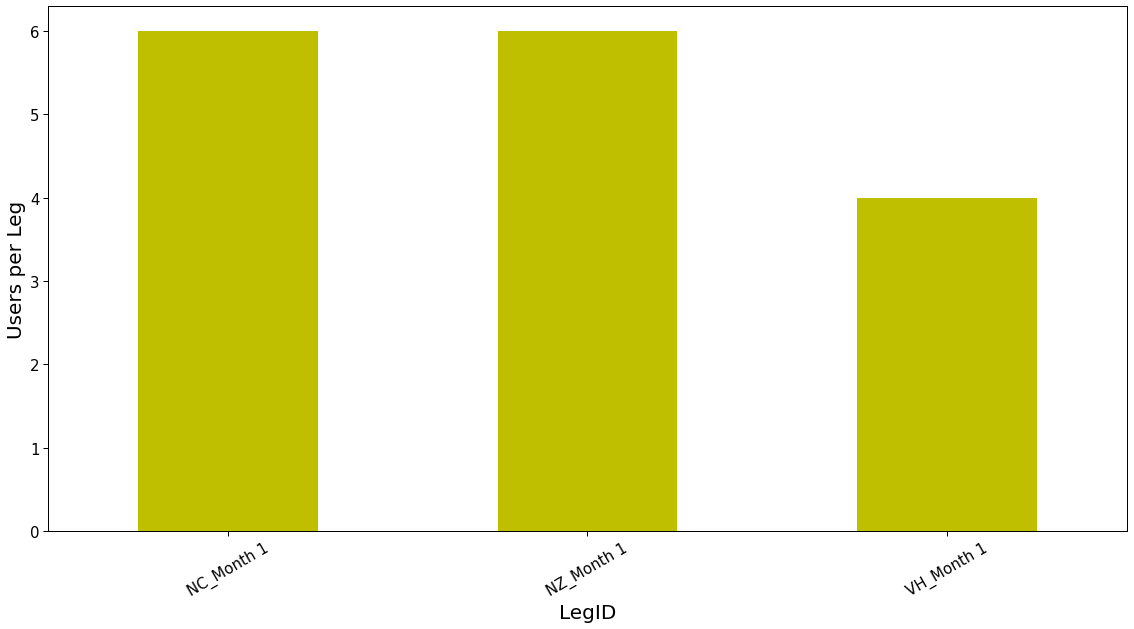

In [29]:
df3 = pd.DataFrame()  #clear any data
df3b = pd.DataFrame()
# df3=df2.copy()

# print(dfpoo)

df3 = df2.groupby(['LegID','TimeID','User'])['mass'].size().reset_index()
df3b = df3.groupby(['LegID','TimeID'])['User'].size().reset_index()
df3b['LegName'] = df3b['LegID'] + '_' + df3b['TimeID']
df3b.set_index('LegName', inplace=True)

# print(df3)

fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)

ax = df3b['User'].plot.bar(color='y')
ax.set_ylabel('Users per Leg',fontsize=20)
ax.set_xlabel('LegID',fontsize=20)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()


picname = nameForImage + '_UsersPerLeg' + '.png'
fig.savefig(picname, transparent=True)

<h1>Data for uses (delay between strokes lessthan 10sec)</h1>

1005


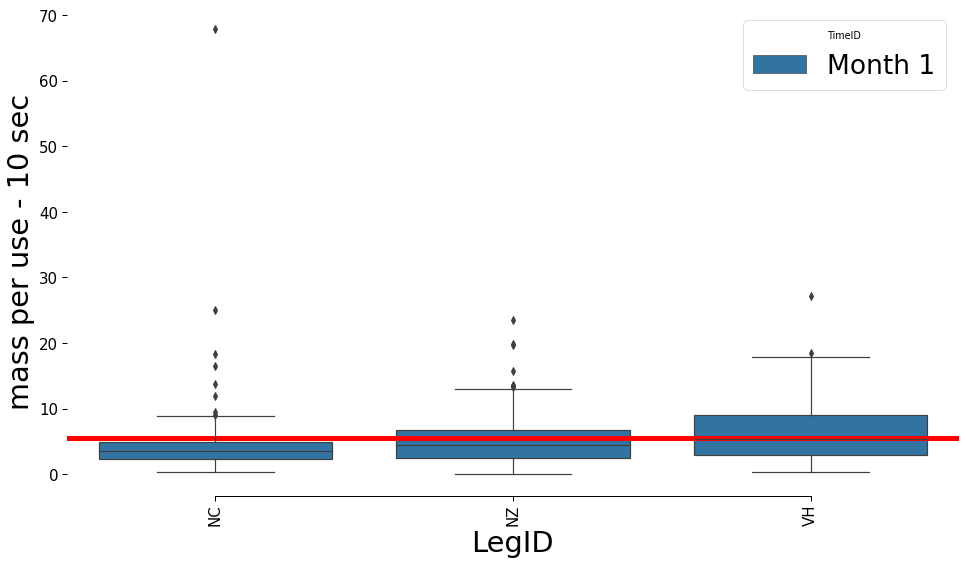

In [107]:
# Mass per Use per study leg (1 use is a group of sprays with less than 10 sec gap between each)

df8 = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()
df13 = pd.DataFrame()
dfGap = pd.DataFrame()
dfGapInd1 = pd.DataFrame()
dfGapInd2 = pd.DataFrame()
dfUse = pd.DataFrame()
dfUse1 = pd.DataFrame()
dfUseTot = pd.DataFrame()

UseCut=10    #second gap to consider a separate use

# print(df2)
dfGap=df2.filter(['LegID','TimeID','User','sprayer','mass','datetime','gap','duration','date'])
dfGap.sort_values(by=['LegID','TimeID','User','datetime'], inplace=True)
dfGap['gap'] = dfGap['datetime'].diff().dt.total_seconds()
# dfGap=dfGap.dropna()
dfGap.reset_index(inplace=True)
# print(dfGap)

# make list of indexes for use cut offs
dfGapInd1a = dfGap.iloc[:1]
dfGapInd1b = dfGap[(dfGap['gap']>UseCut) | (dfGap['gap']<-1)]
# print(dfGapInd1a)
# print(dfGapInd1b)
dfGapInd1 = pd.concat([dfGapInd1a,dfGapInd1b], sort=True)
dfGapInd2 = dfGapInd1.index
# dfGapInd2=dfGapHelp + dfGapHelp2
print(len(dfGap))
# print(dfGap)
# print(len(dfGapInd2))
# print(dfGapInd2)

# fig1, ax2 = plt.subplots(1,1) #Add subplot to figure
# plt.scatter(dfGap['sprayer'],dfGap['gap'], s=5, c='r')
# fig1.set_size_inches(16,9)

indexStart=0
indexEnd=0
useCnt=1

for i in range(0 ,len(dfGapInd2)):
#     print(i,dfGapInd2[i],len(dfGapInd2))    
    indexStart=dfGapInd2[i]
    if i == len(dfGapInd2)-1:
        indexEnd=len(dfGap)
    else:
        indexEnd=dfGapInd2[i+1]
        
#     print(indexStart)
#     print(indexEnd)
    dfUse=dfGap.iloc[indexStart:indexEnd]
    dfUse1=dfUse.copy()
    dfUse1['Use']= useCnt
#     print(dfUse1)
    dfUseTot=dfUseTot.append(dfUse1)
    
    if i != len(dfGapInd2)-1:        
        if dfGap['User'].iloc[indexStart]!=dfGap['User'].iloc[indexEnd]:
            useCnt=1
        else:
            useCnt+=1

# print(dfGap)
# print(dfUseTot)

df30 = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"], dfUseTot["Use"]]).sum().reset_index()

# print(df30)


totalmass=df30['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30)
# ax.set_ylim([0, 80])
ax.set_ylabel('mass per use - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_mass_ByUse' + '.png'
fig.savefig(picname, transparent=True)

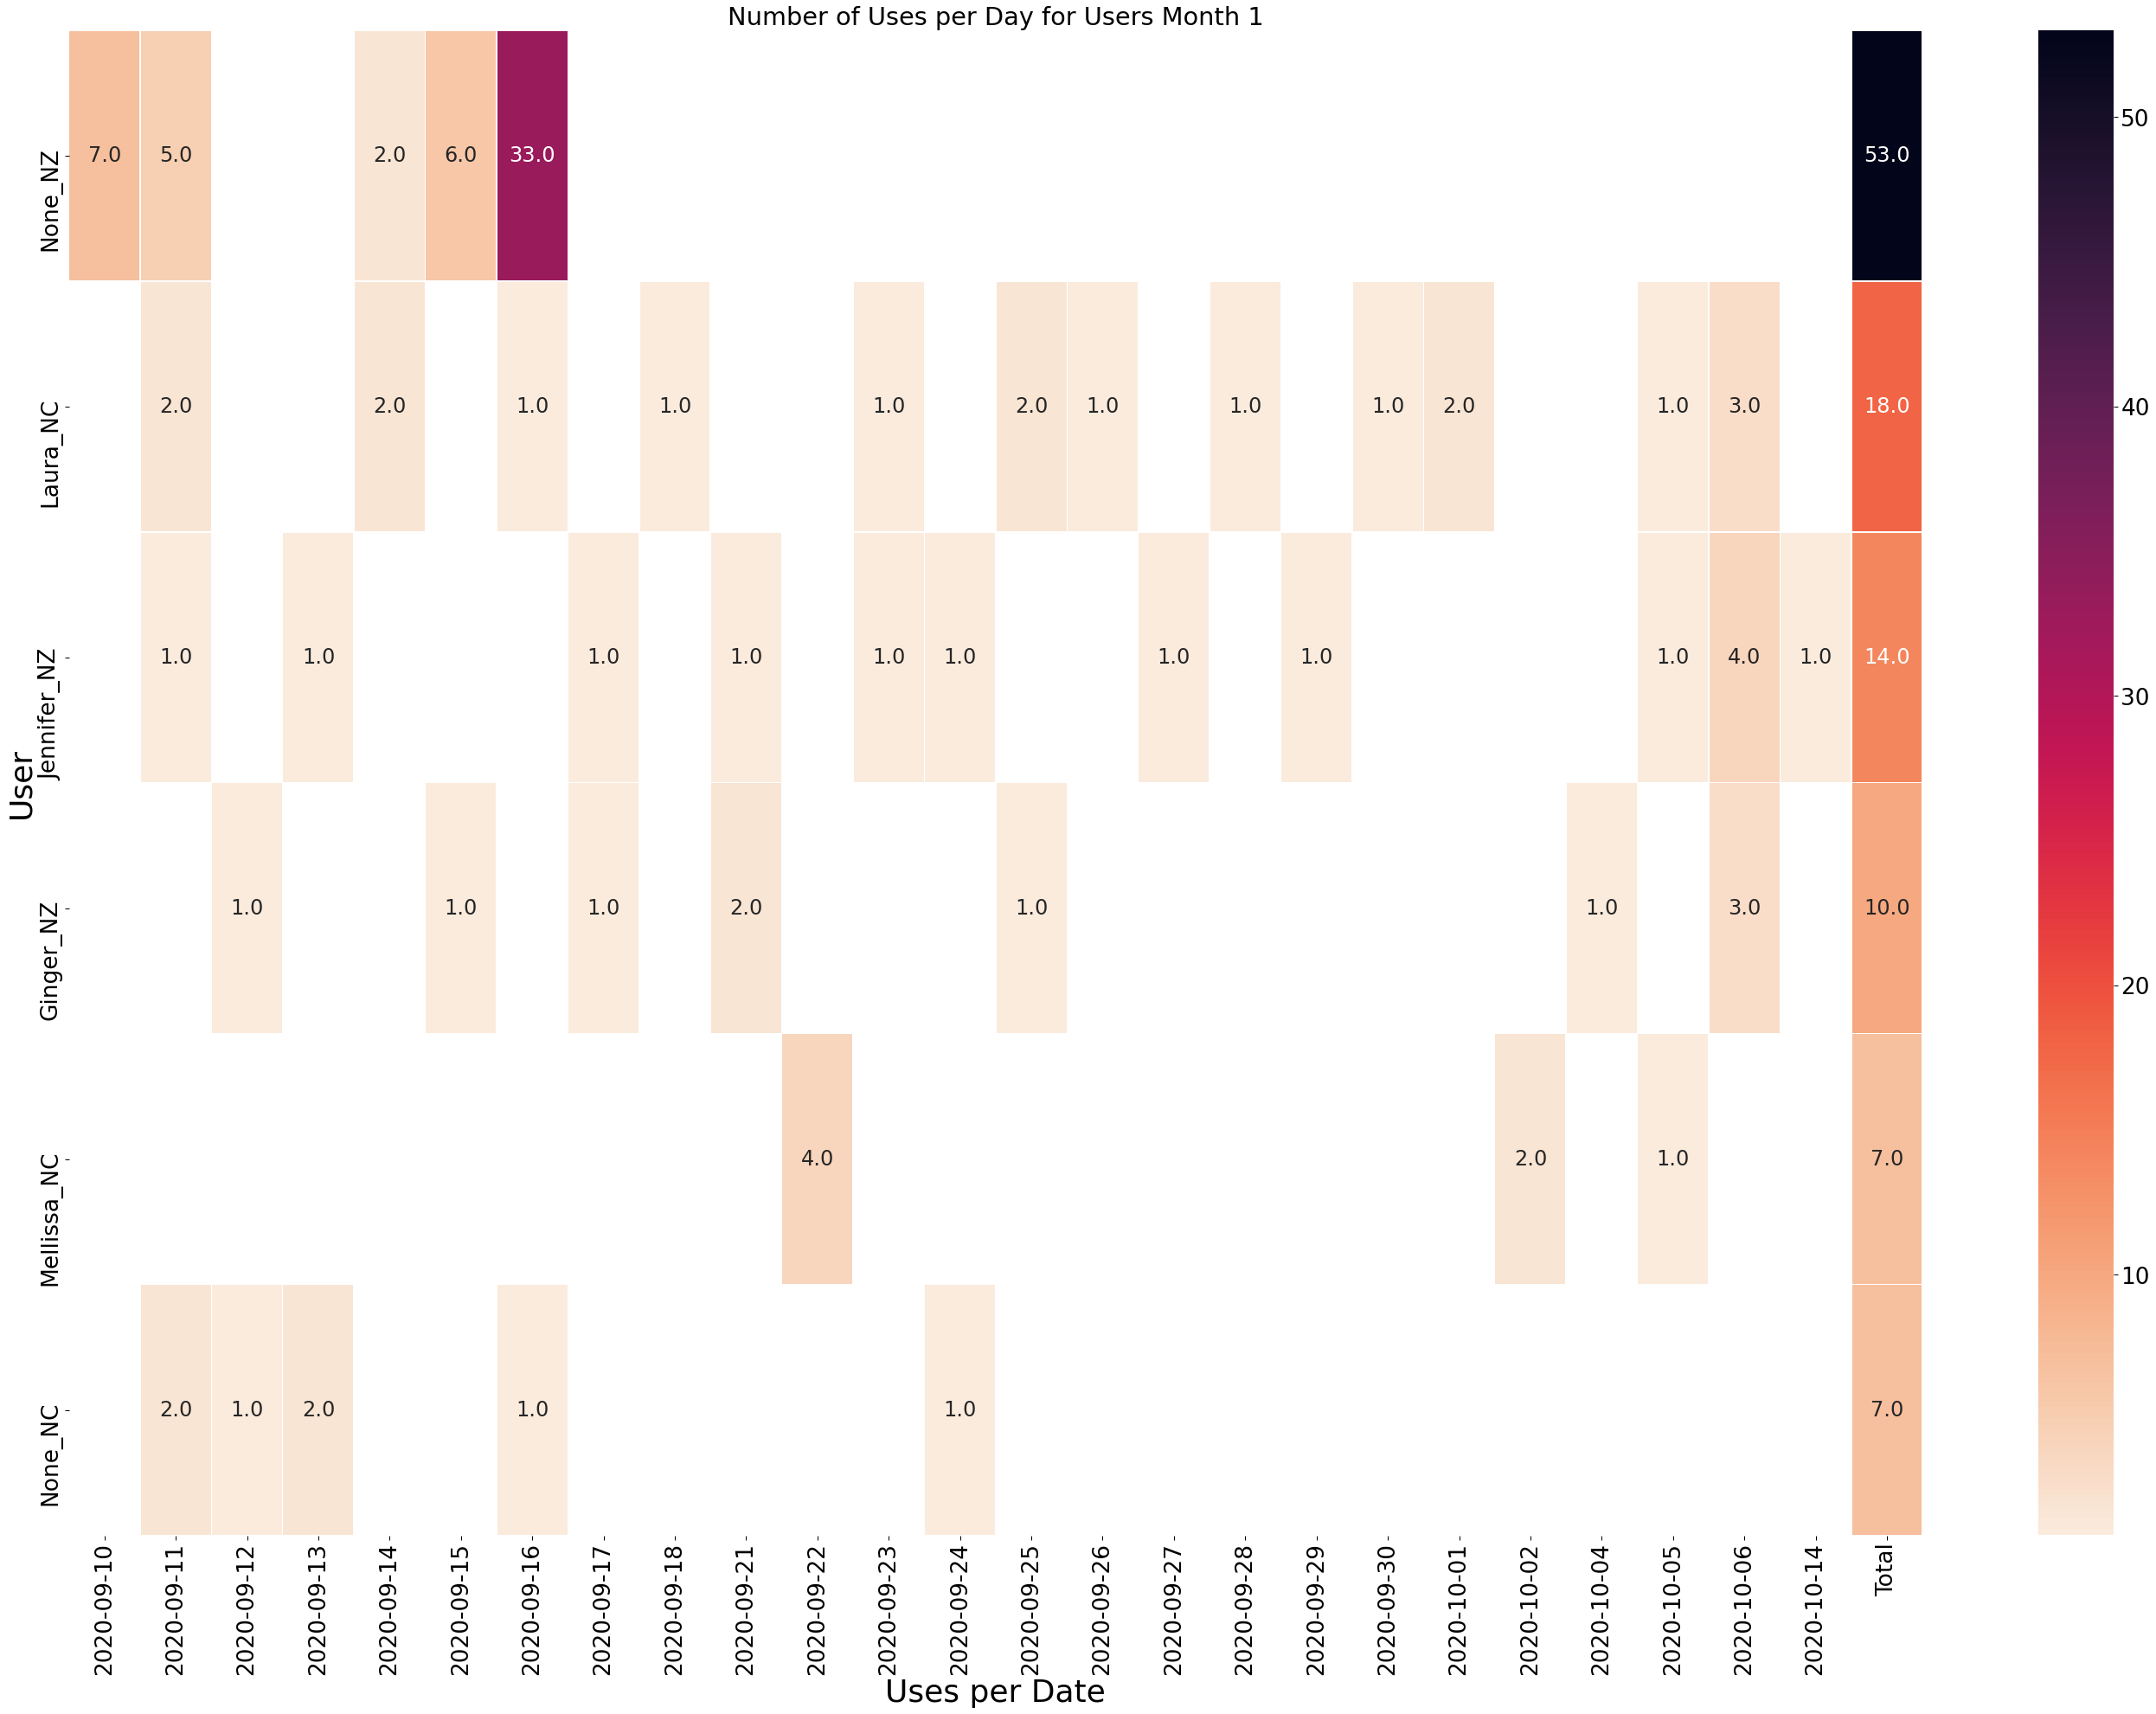

In [108]:
#Group the table by user, use-- count uses for each date

dfUseDates0=dfUseTot.copy()

Laura=['Laura','VH_008','NC_026c']
Melissa=['Mellissa','NZ_019_fix','VH_007','NC_017']
Allison=['Allison','NC_012','NZ_022_fix']
Jennifer=['Jennifer','VH_005','NC_015','NZ_025']
Mandy=['Mandy','NC_011_fix','NZ_021']
Ginger=['Ginger','VH_004','NC_014','NZ_024']
Deanne=['Deanne','NZ_018','VH_006','NC_016']
nameList=[Laura,Melissa,Allison,Jennifer,Mandy,Ginger,Deanne]

# startMo1 = '2020-07-21'
# endMo1 ='2020-08-24'
# startMo1 = '2020-08-18'
# endMo1 ='2020-09-10'
startMo1 = '2020-09-10'
endMo1 ='2020-10-24'

# dateMask1 = (dfUseDates0['datetime'] > startMo1) & (dfUseDates0['datetime'] <= endMo1)
# dfUseDates0 = dfUseDates0.loc[dateMask1].copy()


def userToName(userInput, nameList):
    for name1 in nameList:
        if userInput in name1:
            return name1[0]
    

dfUseDates0['User']=dfUseDates0['User'].apply(lambda x: userToName(x,nameList))

# df['combined']=df.apply(lambda x:'%s_%s' % (x['foo'],x['bar']),axis=1)

dfUseDates0['UserLeg']=dfUseDates0.apply(lambda x: '%s_%s' % (x['User'],x['LegID']),axis=1)

dateMask1 = (dfUseDates0['datetime'] > startMo1) & (dfUseDates0['datetime'] <= endMo1)
dfUseDatesA = dfUseDates0.loc[dateMask1].copy()

# dfUseDates = dfUseDatesA.Use.groupby([dfUseDatesA["UserLeg"], dfUseDatesA["date"]]).size().reset_index()
dfUseDates = dfUseDatesA.Use.groupby([dfUseDatesA["UserLeg"], dfUseDatesA["date"]]).nunique().reset_index()
# print(dfUseDates)
dfUseDates1 = dfUseDates.pivot("UserLeg", "date", 'Use')
dfUseDates1['Total'] = dfUseDates1.sum(axis=1)
dfUseDates1 = dfUseDates1.sort_values('Total',ascending=False)
# df32 = df31.copy()
# print(dfUseDates1)


sns.set_context("paper", font_scale=3)
plt.rcParams.update({'font.size': 24})
# sns.set()
fig, ax = plt.subplots(figsize=(48,32))
cmap = sns.cm.rocket_r

mapTitle='Number of Uses per Day for Users Month 1'
sns.heatmap(dfUseDates1, cmap=cmap, annot=True, linewidths=.5, ax=ax,fmt='.1f').set_title(mapTitle)
ax.set_ylabel('User',fontsize=36)
ax.set_xlabel('Uses per Date',fontsize=36)

# excelextension = '.xlsx'
# exceljoinedfilename = dataDir+'_Gap'+excelextension
# writer = ExcelWriter(exceljoinedfilename) #set file name
# dfGap.to_excel(writer,'Sheet2') #Write df4 data table to sheet 1 of file
# writer.save() #save file

# picname =nameForImage + '_datesOfUses_mo1' + '.png'
# picname =nameForImage + '_datesOfUses_mo2' + '.png'
picname =nameForImage + '_datesOfUses_mo3' + '.png'
# picname =nameForImage + '_datesOfUses_all' + '.png'
fig.savefig(picname, transparent=True)

In [109]:

dfUselist=dfUseDates0.copy()
# dfUselist['User'].apply(lambda x: 'None' if x=='' else x)
dfUselist1 = dfUselist.datetime.groupby([dfUselist["LegID"],dfUselist['User'],dfUselist["Use"]]).min().reset_index()
print(dfUselist1)


dfUselist1.to_csv(nameForImage + '_UsesTable_byUser' + '.csv')



    LegID      User  Use                datetime
0      NC    Ginger    1 2020-08-26 20:06:31.233
1      NC    Ginger    2 2020-08-27 12:43:13.076
2      NC    Ginger    3 2020-08-30 17:45:00.579
3      NC    Ginger    4 2020-08-30 19:30:21.089
4      NC    Ginger    5 2020-08-31 08:07:00.050
..    ...       ...  ...                     ...
208    VH     Laura   10 2020-09-07 08:06:44.244
209    VH     Laura   11 2020-09-09 08:38:54.343
210    VH  Mellissa    1 2020-08-25 20:33:29.910
211    VH  Mellissa    2 2020-09-04 21:04:14.270
212    VH  Mellissa    3 2020-09-06 14:42:48.779

[213 rows x 4 columns]


    LegID   TimeID        User  Use   duration
0      NC  Month 1  NC_011_fix    1  19.777226
1      NC  Month 1  NC_011_fix    2   4.949286
2      NC  Month 1  NC_011_fix    3   0.557666
3      NC  Month 1  NC_011_fix    4  15.604690
4      NC  Month 1  NC_011_fix    5   5.556743
..    ...      ...         ...  ...        ...
288    VH  Month 1      VH_008    7   2.086664
289    VH  Month 1      VH_008    8   1.809761
290    VH  Month 1      VH_008    9   9.454270
291    VH  Month 1      VH_008   10   2.195448
292    VH  Month 1      VH_008   11   5.449061

[293 rows x 5 columns]


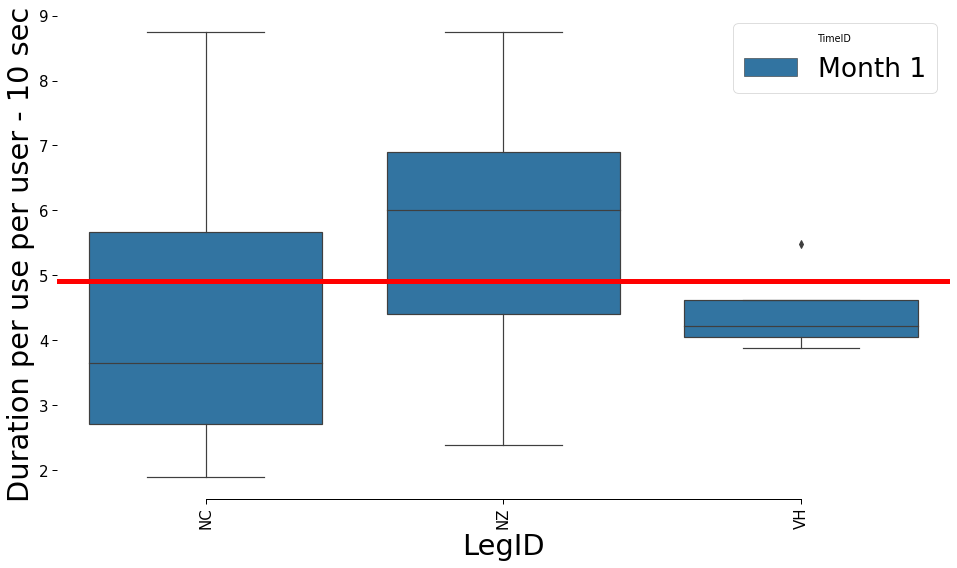

In [110]:
# average Duration of sprays per use for each user in study leg

df30b = dfUseTot.duration.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).sum().reset_index()
# print(dfUseTot)
print(df30b)
df30c = df30b.duration.groupby([df30b["LegID"],df30b["TimeID"], df30b["User"]]).mean().reset_index()
# print(df30c)

totalDur2=df30c['duration'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalDur2, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="duration", data=df30c)
# ax.set_ylim([0, 60])
ax.set_ylabel('Duration per use per user - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_durationPerUse_ByUser' + '.png'
fig.savefig(picname, transparent=True)

    LegID   TimeID        User  Use   duration
0     all  Month 1  NC_011_fix    1  19.777226
1     all  Month 1  NC_011_fix    2   4.949286
2     all  Month 1  NC_011_fix    3   0.557666
3     all  Month 1  NC_011_fix    4  15.604690
4     all  Month 1  NC_011_fix    5   5.556743
..    ...      ...         ...  ...        ...
288   all  Month 1      VH_008    7   2.086664
289   all  Month 1      VH_008    8   1.809761
290   all  Month 1      VH_008    9   9.454270
291   all  Month 1      VH_008   10   2.195448
292   all  Month 1      VH_008   11   5.449061

[293 rows x 5 columns]


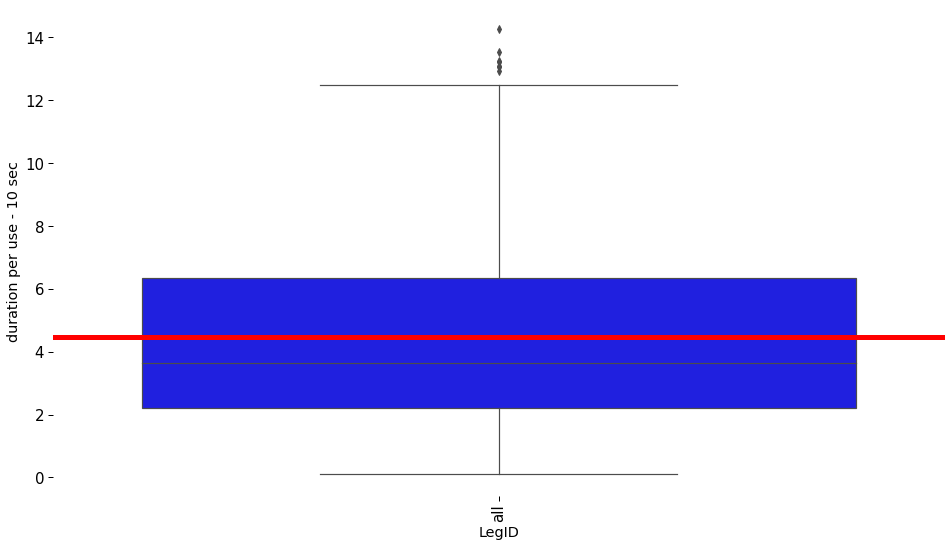

In [175]:
# box of duration per use filtered to most common

# df30b = dfUseTot.duration.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).sum().reset_index()
# # print(dfUseTot)
# # print(df30b)
# df30c = df30b.duration.groupby([df30b["LegID"],df30b["TimeID"], df30b["User"]]).mean().reset_index()
# # print(df30c)

# plt.rcParams.update({'font.size': 15})
# dfdurHist=df30b[df30b['Use']<30]
# n_bins = 10
# x_hist=dfdurHist['Use']
# fig, ax = plt.subplots(figsize=(16,9))
# n, bins, patches = ax.hist(x_hist, n_bins)

# ax.set_xlabel('Duration of Use(sec)')
# plt.show()

# picname = dataDir + nameForImage + '_trigSpeed_hist' + '.png'
# picname = nameForImage + '_UseDurationHist' + '.png'
# fig.savefig(picname, transparent=True)




# df30b['LegID']='all'
# print(df30b)

df30b=df30b[df30b['duration']<15]
totalmass2=df30b['duration'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass2, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

# ax = sns.boxplot(x="LegID",hue='TimeID', y="duration", data=df30b)

my_pal = {"NC": "grey", "VH": "blue", "NZ":"teal", 'all':'blue'}

ax = sns.boxplot(x="LegID",y="duration", data=df30b, palette=my_pal)
# ax.set_ylim([0, 60])
ax.set_ylabel('duration per use - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 
# picname =nameForImage + '_durationPerUse_all_Filtered' + '.png'
# fig.savefig(picname, transparent=True)


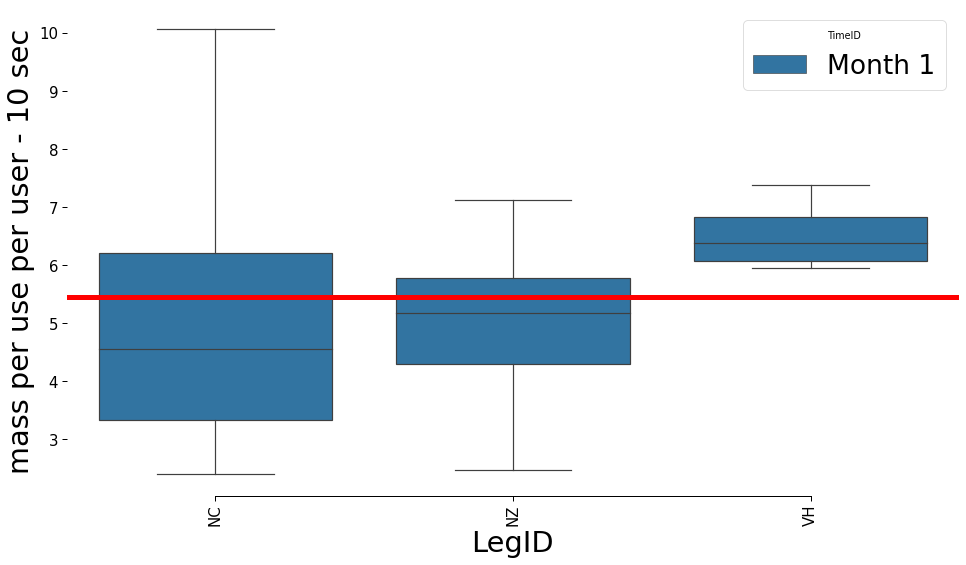

In [34]:
# average mass per use for each user in study leg

df30b = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).sum().reset_index()
# print(dfUseTot)
# print(df30b)
df30c = df30b.mass.groupby([df30b["LegID"],df30b["TimeID"], df30b["User"]]).mean().reset_index()
# print(df30c)

totalmass2=df30c['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass2, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30c)
# ax.set_ylim([0, 60])
ax.set_ylabel('mass per use per user - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 
picname =nameForImage + '_massPerUse_ByUser' + '.png'
fig.savefig(picname, transparent=True)

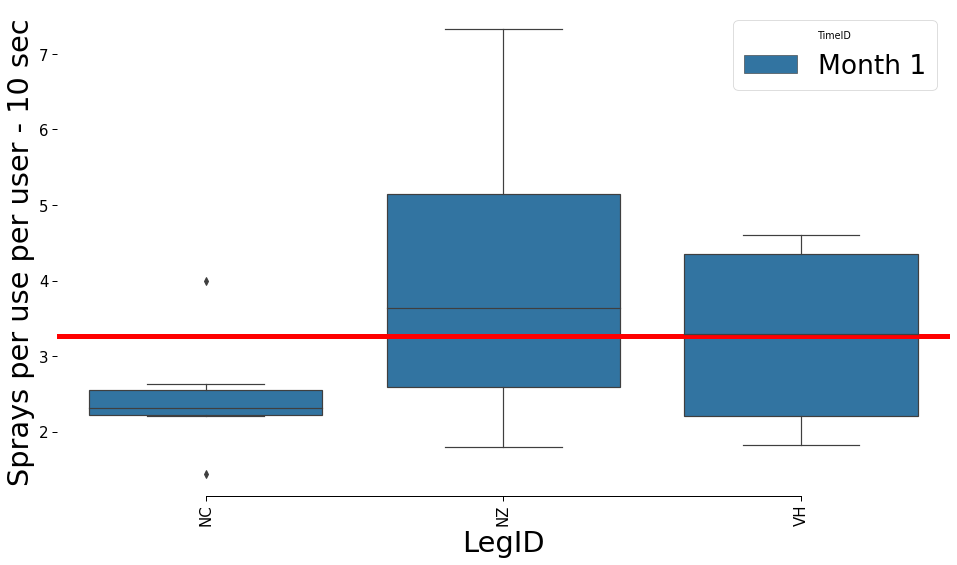

In [35]:
# average number of sprays per use for each user in study leg

df30b = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).size().reset_index()
# print(dfUseTot)
# print(df30b)
df30c = df30b.mass.groupby([df30b["LegID"],df30b["TimeID"], df30b["User"]]).mean().reset_index()
# print(df30c)

totalsprays2=df30c['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalsprays2, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30c)
# ax.set_ylim([0, 60])
ax.set_ylabel('Sprays per use per user - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 
picname =nameForImage + '_spraysPerUse_ByUser' + '.png'
fig.savefig(picname, transparent=True)

   LegID   TimeID        User  Use
0     NC  Month 1  NC_011_fix   10
1     NC  Month 1      NC_013   27
2     NC  Month 1      NC_014   10
3     NC  Month 1      NC_015    9
4     NC  Month 1      NC_017    7
5     NC  Month 1     NC_026c   18
6     NZ  Month 1      NZ_018   47
7     NZ  Month 1  NZ_019_fix   20
8     NZ  Month 1  NZ_022_fix    6
9     NZ  Month 1      NZ_023   53
10    NZ  Month 1      NZ_024   10
11    NZ  Month 1      NZ_025   14
12    VH  Month 1      VH_004   23
13    VH  Month 1      VH_006   25
14    VH  Month 1      VH_007    3
15    VH  Month 1      VH_008   11


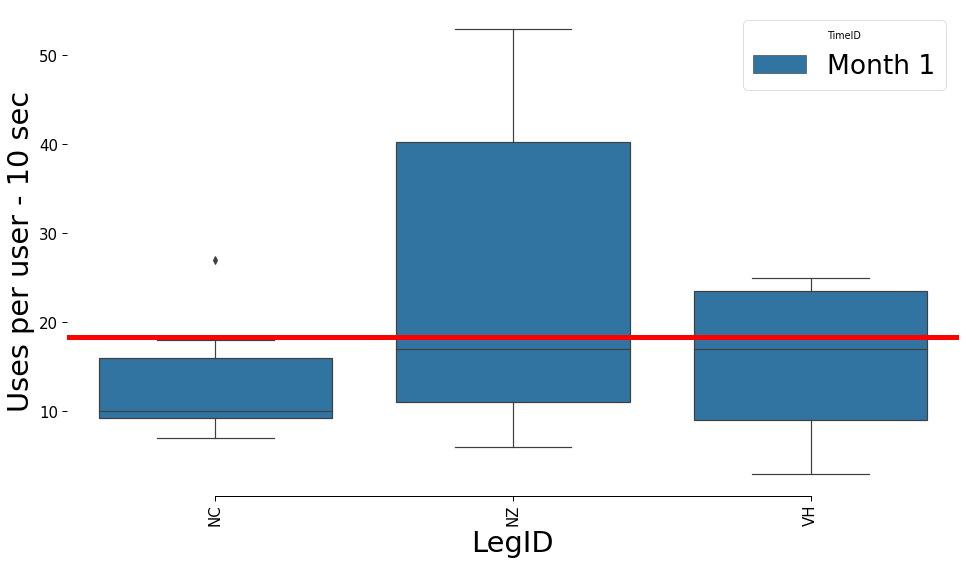

In [36]:
# number of uses for each user in study leg

df30b = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"], dfUseTot["Use"]]).size().reset_index()
df30b2 = df30b.Use.groupby([df30b["LegID"],df30b["TimeID"],df30b['User']]).size().reset_index()
print(df30b2)


totalUses=df30b2['Use'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalUses, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="Use", data=df30b2)
# ax.set_ylim([0, 90])
ax.set_ylabel('Uses per user - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

df30b2.filter(['User','Use']).to_csv(nameForImage + '_UsesTable_byFileID' + '.csv')

picname =nameForImage + '_Uses_PerUser' + '.png'
fig.savefig(picname, transparent=True)

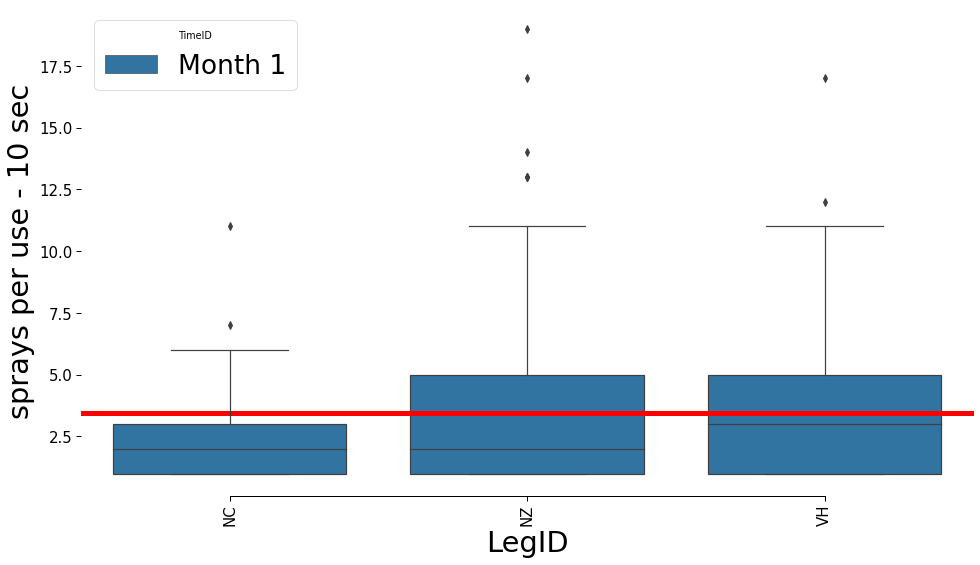

In [37]:
# count of number of sprays in each use

df30c = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).size().reset_index()
# df30d = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"]]).size().reset_index()


# print(df30c)
# print(df30d)


totalUses=df30c['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalUses, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30c)
# ax.set_ylim([0, 50])
ax.set_ylabel('sprays per use - 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_spraysPerUse' + '.png'
fig.savefig(picname, transparent=True)

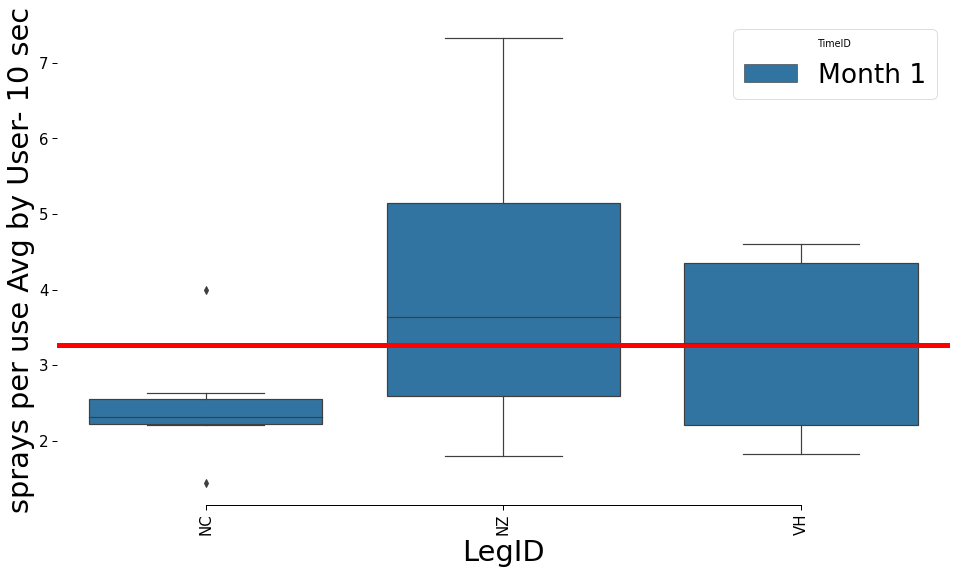

In [38]:
# aVerage number of sprays per use for each user

df30c = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).size().reset_index()
df30d = df30c.mass.groupby([df30c["LegID"],df30c["TimeID"], df30c["User"]]).mean().reset_index()

# print(df30d)

totalUses=df30d['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalUses, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30d)
# ax.set_ylim([0, 50])
ax.set_ylabel('sprays per use Avg by User- 10 sec')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_spraysAverPerUse_ByUser' + '.png'
fig.savefig(picname, transparent=True)

<h1>Repeat for usage occasions (delay between strokes lessthan 8hr)</h1>


1005
Int64Index([   0,   13,   14,   19,   23,   26,   32,   39,   40,   48,
            ...
             983,  985,  987,  991,  994,  995,  997,  998, 1003, 1004],
           dtype='int64', length=165)


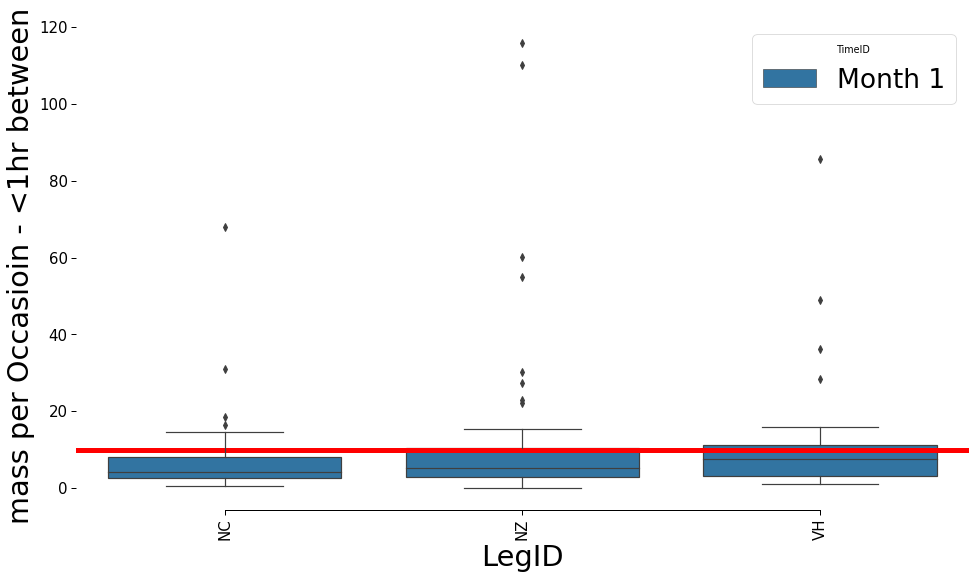

In [55]:
# Mass per occasion per study leg (1 occasion is a group of sprays with less than 1hr gap between each)

df8 = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()
df13 = pd.DataFrame()
dfGap = pd.DataFrame()
dfGapInd1 = pd.DataFrame()
dfGapInd2 = pd.DataFrame()
dfUse = pd.DataFrame()
dfUse1 = pd.DataFrame()
dfUseTot = pd.DataFrame()

UseCut=60*60*1    #second gap to consider a separate occasion (1 hr)

# print(df2)
dfGap=df2.filter(['LegID','TimeID','User','sprayer','mass','datetime','gap','duration','Sprayer_color'])
dfGap.sort_values(by=['LegID','TimeID','User','datetime'], inplace=True)
dfGap['gap'] = dfGap['datetime'].diff().dt.total_seconds()
# dfGap=dfGap.dropna()
dfGap.reset_index(inplace=True)
# print(dfGap)

dfGapInd1a = dfGap.iloc[:1]
dfGapInd1b = dfGap[(dfGap['gap']>UseCut) | (dfGap['gap']<-1)]
# print(dfGapInd1a)
# print(dfGapInd1b)
dfGapInd1 = pd.concat([dfGapInd1a,dfGapInd1b], sort=True)
dfGapInd2 = dfGapInd1.index
# dfGapInd2=dfGapHelp + dfGapHelp2
print(len(dfGap))
# print(dfGap)
# print(len(dfGapInd2))
print(dfGapInd2)

# fig1, ax2 = plt.subplots(1,1) #Add subplot to figure
# plt.scatter(dfGap['sprayer'],dfGap['gap'], s=5, c='r')
# fig1.set_size_inches(16,9)

indexStart=0
indexEnd=0
useCnt=1

for i in range(0 ,len(dfGapInd2)):
#     print(i,dfGapInd2[i],len(dfGapInd2))    
    indexStart=dfGapInd2[i]
    if i == len(dfGapInd2)-1:
        indexEnd=len(dfGap)
    else:
        indexEnd=dfGapInd2[i+1]
        
#     print(indexStart)
#     print(indexEnd)
    dfUse=dfGap.iloc[indexStart:indexEnd]
    dfUse1=dfUse.copy()
    dfUse1['Use']= useCnt
#     print(dfUse1)
    dfUseTot=dfUseTot.append(dfUse1)
    
    if i != len(dfGapInd2)-1:        
        if dfGap['User'].iloc[indexStart]!=dfGap['User'].iloc[indexEnd]:
            useCnt=1
        else:
            useCnt+=1

# print(dfGap)
# print(dfUseTot)

df30 = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"], dfUseTot["Use"]]).sum().reset_index()

# print(df30)


totalmass=df30['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30)
# ax.set_ylim([0, df30d['mass'].max()*1.1])
ax.set_ylabel('mass per Occasioin - <1hr between')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_mass_ByOccasion' + '.png'
fig.savefig(picname, transparent=True)

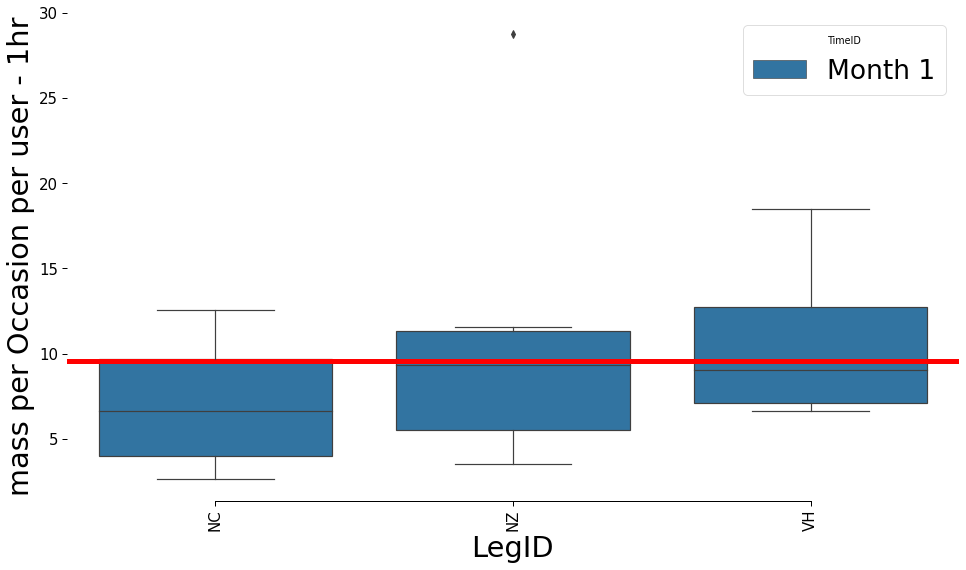

In [56]:
# average mass per use for each user in study leg

df30b = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).sum().reset_index()
# print(dfUseTot)
# print(df30b)
df30c = df30b.mass.groupby([df30b["LegID"],df30b["TimeID"], df30b["User"]]).mean().reset_index()
# print(df30c)

totalmass2=df30c['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalmass2, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30c)
# ax.set_ylim([0, df30d['mass'].max()*1.1])
ax.set_ylabel('mass per Occasion per user - 1hr')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_massPerOccasion_ByUser' + '.png'
fig.savefig(picname, transparent=True)

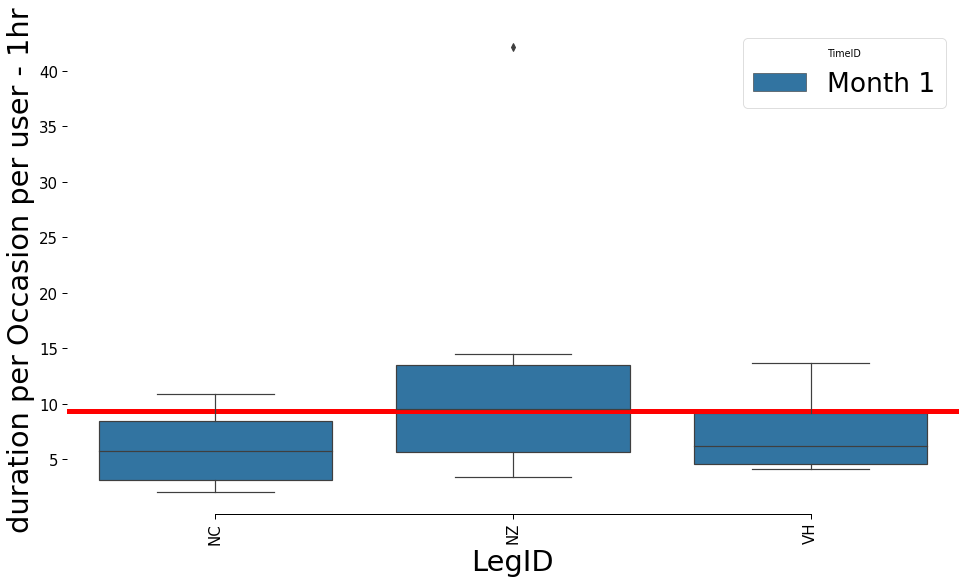

In [57]:
# average duration per occasion for each user in study leg

df30b = dfUseTot.duration.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).sum().reset_index()
# print(dfUseTot)
# print(df30b)
df30c = df30b.duration.groupby([df30b["LegID"],df30b["TimeID"], df30b["User"]]).mean().reset_index()
# print(df30c)

totalduration3=df30c['duration'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalduration3, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="duration", data=df30c)
# ax.set_ylim([0, df30d['mass'].max()*1.1])
ax.set_ylabel('duration per Occasion per user - 1hr')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_durationPerOccasion_ByUser' + '.png'
fig.savefig(picname, transparent=True)

   LegID   TimeID        User  Use
0     NC  Month 1  NC_011_fix    8
1     NC  Month 1      NC_013   19
2     NC  Month 1      NC_014    9
3     NC  Month 1      NC_015    8
4     NC  Month 1      NC_017    4
5     NC  Month 1     NC_026c   14
6     NZ  Month 1      NZ_018   21
7     NZ  Month 1  NZ_019_fix   13
8     NZ  Month 1  NZ_022_fix    4
9     NZ  Month 1      NZ_023   11
10    NZ  Month 1      NZ_024    7
11    NZ  Month 1      NZ_025   12
12    VH  Month 1      VH_004   13
13    VH  Month 1      VH_006   10
14    VH  Month 1      VH_007    3
15    VH  Month 1      VH_008    9


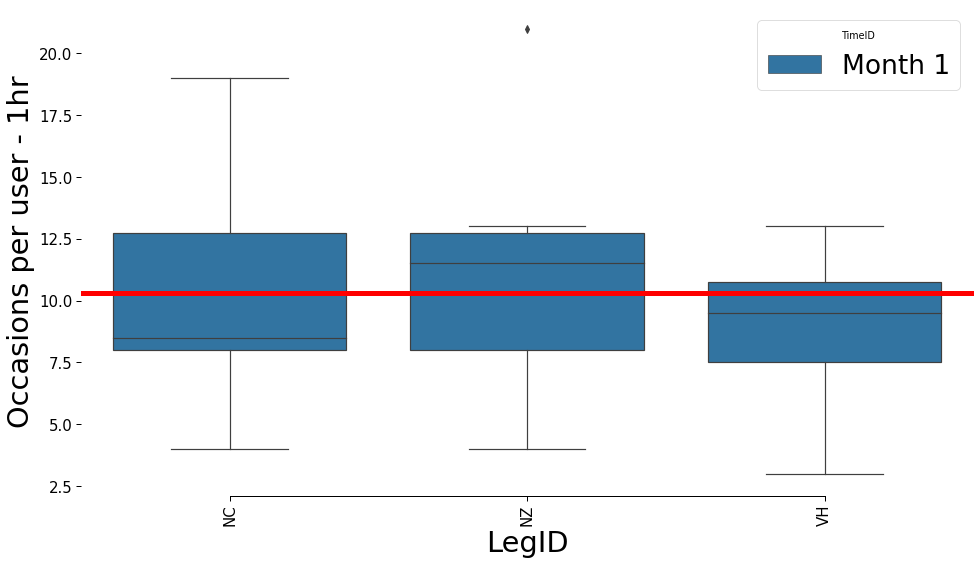

In [58]:
# number of occasions for each user in study leg

df30b = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"], dfUseTot["Use"]]).size().reset_index()
df30b2 = df30b.Use.groupby([df30b["LegID"],df30b["TimeID"],df30b['User']]).size().reset_index()
print(df30b2)


totalUses=df30b2['Use'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalUses, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="Use", data=df30b2)
# ax.set_ylim([0, df30d['mass'].max()*1.1])
ax.set_ylabel('Occasions per user - 1hr')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
df30b2.to_csv(nameForImage + '_Occasions_PerUser1hr' + '.csv')


df30b2.filter(['User','Use']).to_csv(nameForImage + '_OccasionsTable_byFileID' + '.csv')

picname =nameForImage + '_Occasions_PerUser' + '.png'
fig.savefig(picname, transparent=True)

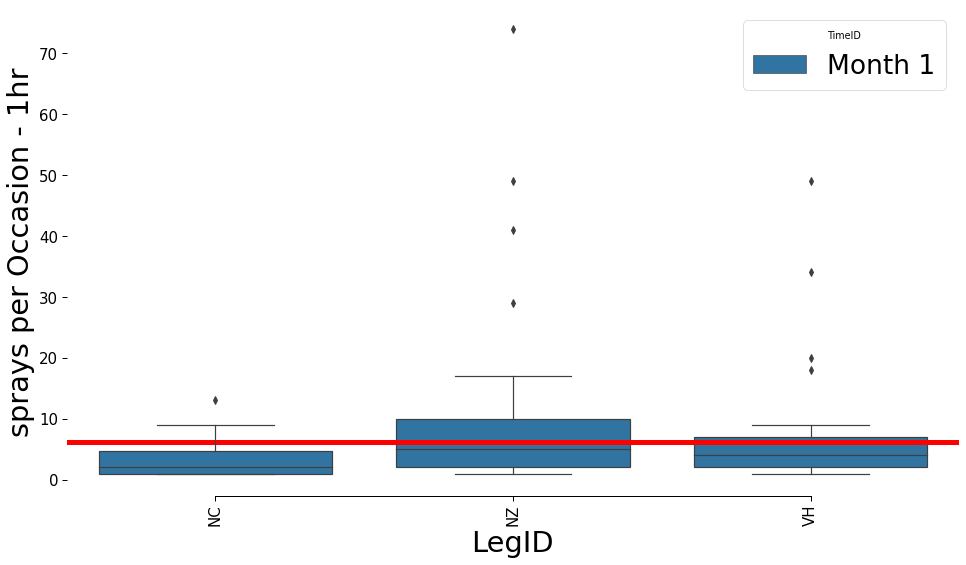

In [59]:
# count of number of sprays in each occasion

df30c = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).size().reset_index()
# df30d = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"]]).size().reset_index()


# print(df30c)
# print(df30d)


totalUses=df30c['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalUses, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30c)
# ax.set_ylim([0, df30c['mass'].max()])
ax.set_ylabel('sprays per Occasion - 1hr')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_spraysPerOccasion' + '.png'
fig.savefig(picname, transparent=True)

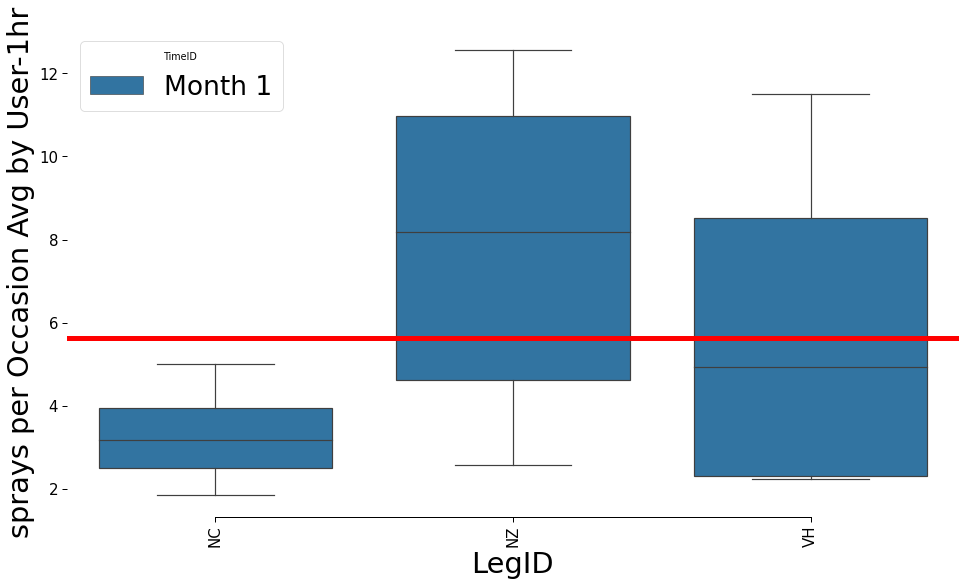

In [60]:
# aVerage number of sprays per occasion for each user

df30c = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],dfUseTot["Use"]]).size().reset_index()
df30d = df30c.mass.groupby([df30c["LegID"],df30c["TimeID"], df30c["User"]]).mean().reset_index()

# print(df30d)

totalUses=df30d['mass'].mean()
fig, ax = plt.subplots() #Add subplot to figure
plt.hlines(totalUses, -1, 5,linewidth=5,color='red')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="LegID",hue='TimeID', y="mass", data=df30d)
# ax.set_ylim([0, 80])
# ax.set_ylim([0, df30d['mass'].max()*1.1])
ax.set_ylabel('sprays per Occasion Avg by User-1hr')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)
 

picname =nameForImage + '_spraysAverPerOccasion_ByUser' + '.png'
fig.savefig(picname, transparent=True)

   LegID   TimeID Sprayer_color  Occasion  mass        User
0     NC  Month 1          grey         8    40  NC_011_fix
1     NC  Month 1          grey        19    71      NC_013
2     NC  Month 1          grey         9    22      NC_014
3     NC  Month 1          grey         8    21      NC_015
4     NC  Month 1          grey         4    16      NC_017
5     NC  Month 1          grey        14    26     NC_026c
6     NZ  Month 1          teal        21   264      NZ_018
7     NZ  Month 1          teal        13    71  NZ_019_fix
8     NZ  Month 1          teal         4    44  NZ_022_fix
9     NZ  Month 1          teal        11   120      NZ_023
10    NZ  Month 1          teal         7    18      NZ_024
11    NZ  Month 1          teal        12    52      NZ_025
12    VH  Month 1          blue        13    98      VH_004
13    VH  Month 1          blue        10   115      VH_006
14    VH  Month 1          blue         3     7      VH_007
15    VH  Month 1          blue         

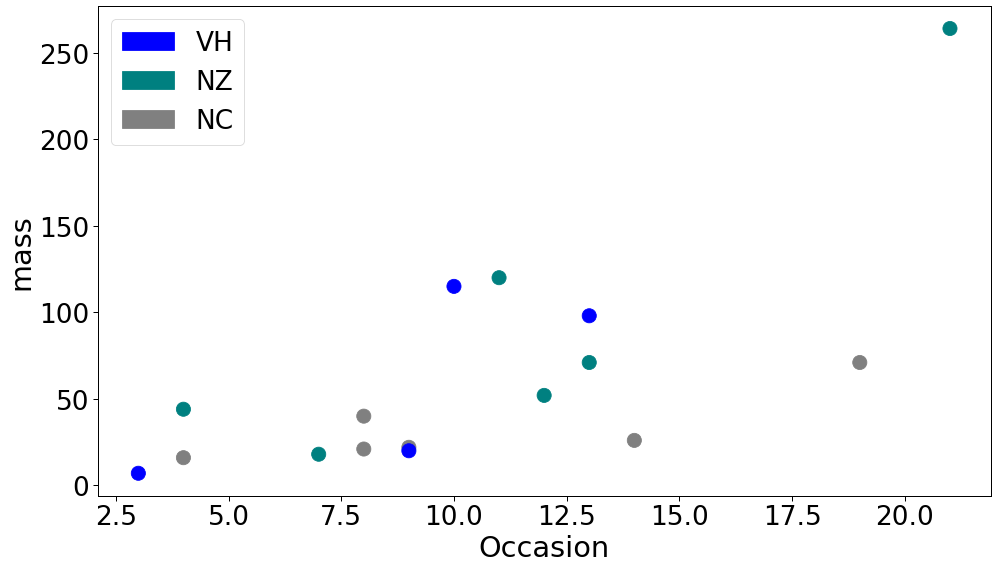

In [106]:
import matplotlib.patches as mpatches

df30c = dfUseTot.mass.groupby([dfUseTot["LegID"],dfUseTot["TimeID"], dfUseTot["User"],
                               dfUseTot['Sprayer_color'],dfUseTot["Use"]]).size().reset_index()
# df30d = df30c.mass.groupby([df30c["LegID"],df30c["TimeID"], df30c["User"]]).size().reset_index()
# df30d=df30d.rename(columns={'mass':'Occasion'})
df30da = df30c.mass.groupby([df30c["LegID"],df30c["TimeID"], df30c["Sprayer_color"]]).size().reset_index()
df30da=df30da.rename(columns={'mass':'Occasion'})

df30d2 = df30c.mass.groupby([df30c["LegID"],df30c["TimeID"], df30c["User"]]).sum().reset_index()
# print(df30da)
# print(df30d2)
df30da3=df30da.join(df30d2[{'User','mass'}])
df30da3['Sprayer_color']=df30da3["LegID"].apply(lambda x: 'blue' if x=='VH' else ('teal' if x=='NZ' else 'grey'))
print(df30da3)

x_name='Occasion'
# x_name='degrees'
y_name='mass'
# y_name='Deg/Sec'

x_scat = df30da3[x_name]
y_scat = df30da3[y_name]
color_scat = df30da3['Sprayer_color']

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.scatter(x_scat,y_scat, s=200, c=color_scat)
fig.set_size_inches(16,9)

ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
# ax.legend(df30da3['Sprayer_color'],df30da3['User'])

VHleg = mpatches.Patch(color='blue', label='VH')
NZleg = mpatches.Patch(color='teal', label='NZ')
NCleg = mpatches.Patch(color='grey', label='NC')
allcolors={VHleg,NZleg,NCleg}
plt.legend(handles=[VHleg,NZleg,NCleg])

plt.show()
picname = nameForImage + '_Occasions_v_Mass' + '.png'
fig.savefig(picname, transparent=True)

In [62]:
# compare shake and no shake instructions for Stride data

# dfShake=pd.DataFrame()

# # print(df2)
# dfShake=df2.filter(['LegID','TimeID','User','mass','datetime','gap'])
# Legs = ['FUL','CUL']
# dfShake = dfShake[dfShake.LegID.isin(Legs)]
# dfShake['ShakeInst1']=dfShake['User'].str[-1:]

# conditions = [( dfShake['ShakeInst1'] =='S' ),
#               ( dfShake['ShakeInst1'] =='s' ),
#               ( dfShake['ShakeInst1'] =='K' ),
#               ( dfShake['ShakeInst1'] =='k' ), ]
# choices = ['no Shake Instruction','no Shake Instruction','Shake Instrucion','Shake Instrucion']
# dfShake['ShakeInst'] = np.select(conditions, choices) 

# # print(dfShake.head())


# dfShake2 = dfShake.groupby(['LegID','ShakeInst','User'])['mass'].sum().reset_index()
# # dfShake2 = dfShake[dfShake['mass']<400]
# # print(df2b)
# # df2c=df2b.copy()
# del dfShake2['User']
# totalmass=dfShake2['mass'].mean()

# fig, ax = plt.subplots() #Add subplot to figure
# plt.hlines(totalmass, -1, 5,linewidth=5,color='red')
# fig.set_size_inches(16,9)

# ax = sns.boxplot(x="LegID",hue='ShakeInst', y="mass", data=dfShake2)
# # ax.set_ylim([-100, 100])
# plt.xticks(rotation=90, fontsize=15)
# plt.yticks(rotation=0, fontsize=15)
# ax.set_ylabel('Mass Per User')
# sns.despine(trim=True, left=True)

# # picname = dataDir + nameForImage + '_TotalMass_Box_shakeInstruction' + '.png'
# picname = nameForImage + '_TotalMass_Box_byShakeInstruction' + '.png'
# fig.savefig(picname, transparent=True)




In [63]:
# number of users for the Stride shake , no shake legs


# dfShake3 = dfShake.groupby(['LegID','ShakeInst','User'])['mass'].size().reset_index()
# dfShake4 = dfShake3.groupby(['LegID','ShakeInst'])['User'].size().reset_index()
# dfShake4['LegName'] = dfShake4['LegID'] + '_' + dfShake4['ShakeInst']
# dfShake4.set_index('LegName', inplace=True)

# # print(df3)

# fig, ax = plt.subplots(1,1) #Add subplot to figure
# fig.set_size_inches(12,6)

# ax = dfShake4['User'].plot.bar(color='y')
# ax.set_ylabel('Users per Leg',fontsize=20)
# ax.set_xlabel('LegID',fontsize=20)
# plt.xticks(rotation=30,fontsize=15)
# plt.yticks(fontsize=15)
# plt.tight_layout()

# picname = nameForImage + '_UsersPerLeg_shakeInstruction' + '.png'
# fig.savefig(picname, transparent=True)

